<h1 style="text-align:center; color:darkred; font-weight:bold;">Employee Attrition</h1>



<h3 style="color:darkred; font-weight:bold;">Introduction: </h3>

In the world of business, employee attrition occurs when employees exit a company, whether due to finding a new job, retiring, or other reasons, and their positions aren't immediately filled by new hires.

To achieve success, a company must not just recruit skilled individuals but also ensure they stick around. That's where my role comes in: I'm tasked with analyzing a dataset containing details about a company's employees. The goal is to uncover trends that could offer valuable insights into why employees choose to depart.






<h3 style="color:darkred; font-weight:bold;">Step 1: Data Exploration </h3>

1. Read the dataset and calculate the number of rows and columns.
2. Check for duplicate lines in the data.
3. Calculate the percentage of missing values for each column.
4. Generate descriptive statistics for each column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore') # ignore warnings.

In [2]:
df=pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.shape

(1470, 35)

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Define the column names and descriptions
column_names = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
                'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
                'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']

descriptions = [
    """Employee's age""",
    """Does the employee leave the organization""",
    """Frequency of employees' business trips""",
    """Daily salary rate for employees""",
    """Office of employees""",
    """Distance from home in miles to work""",
    """Level of education achieved by staff""",
    """Employee's field of study""",
    """Total number of employees in the organization""",
    """A unique identifier for each employee record""",
    """Employee satisfaction with their working environment""",
    """Employee's Gender""",
    """Hourly rate for employees""",
    """Level of involvement required for the employee's job""",
    """Employee's level of work""",
    """The role of employees in the organization""",
    """Employee satisfaction with their work""",
    """Employee's marital status""",
    """Employee's monthly income""",
    """Monthly salary rate for employees""",
    """Number of companies the employee worked for""",
    """Whether the employee is over 18 years old""",
    """Do employees work overtime""",
    """Salary increase rate for employees""",
    """The performance rating of the employee""",
    """Employee satisfaction with their relationships""",
    """Standard working hours for employees""",
    """Employee stock option level""",
    """Total number of years the employee has worked""",
    """Number of times employees were taken to training in the last year""",
    """Employees' perception of their work-life balance""",
    """Number of years employees have been with the company""",
    """Number of years the employee has been in their current role""",
    """Number of years since employee's last promotion""",
    """Number of years an employee has been with their current manager"""
]

# Create a DataFrame with the column names and descriptions
data_info = pd.DataFrame({"Column_names": column_names, "Description": descriptions})

# Display the DataFrame
data_info


Column_names  \
0                        Age   
1                  Attrition   
2             BusinessTravel   
3                  DailyRate   
4                 Department   
5           DistanceFromHome   
6                  Education   
7             EducationField   
8              EmployeeCount   
9             EmployeeNumber   
10   EnvironmentSatisfaction   
11                    Gender   
12                HourlyRate   
13            JobInvolvement   
14                  JobLevel   
15                   JobRole   
16           JobSatisfaction   
17             MaritalStatus   
18             MonthlyIncome   
19               MonthlyRate   
20        NumCompaniesWorked   
21                    Over18   
22                  OverTime   
23         PercentSalaryHike   
24         PerformanceRating   
25  RelationshipSatisfaction   
26             StandardHours   
27          StockOptionLevel   
28         TotalWorkingYears   
29     TrainingTimesLastYear   
30           WorkLifeBalance   
31            YearsAtCompany   
32        YearsInCurrentRole   
33   YearsSinceLastPromotion   
34      YearsWithCurrManager   

                                          Description  
0                                      Employee's age  
1            Does the employee leave the organization  
2              Frequency of employees' business trips  
3                     Daily salary rate for employees  
4                                 Office of employees  
5                 Distance from home in miles to work  
6                Level of education achieved by staff  
7                           Employee's field of study  
8       Total number of employees in the organization  
9        A unique identifier for each employee record  
10  Employee satisfaction with their working envir...  
11                                  Employee's Gender  
12                          Hourly rate for employees  
13  Level of involvement required for the employee...  
14                           Employee's level of work  
15          The role of employees in the organization  
16              Employee satisfaction with their work  
17                          Employee's marital status  
18                          Employee's monthly income  
19                  Monthly salary rate for employees  
20        Number of companies the employee worked for  
21          Whether the employee is over 18 years old  
22                         Do employees work overtime  
23                 Salary increase rate for employees  
24             The performance rating of the employee  
25     Employee satisfaction with their relationships  
26               Standard working hours for employees  
27                        Employee stock option level  
28      Total number of years the employee has worked  
29  Number of times employees were taken to traini...  
30   Employees' perception of their work-life balance  
31  Number of years employees have been with the c...  
32  Number of years the employee has been in their...  
33    Number of years since employee's last promotion  
34  Number of years an employee has been with thei...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1470 entries, 0 to 1469

Data columns (total 35 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   Age                       1470 non-null   int64 

 1   Attrition                 1470 non-null   object

 2   BusinessTravel            1470 non-null   object

 3   DailyRate                 1470 non-null   int64 

 4   Department                1470 non-null   object

 5   DistanceFromHome          1470 non-null   int64 

 6   Education                 1470 non-null   int64 

 7   EducationField            1470 non-null   object

 8   EmployeeCount             1470 non-null   int64 

 9   EmployeeNumber            1470 non-null   int64 

 10  EnvironmentSatisfaction   1470 non-null   int64 

 11  Gender                    1470 non-null   object

 12  HourlyRate                1470 non-null   int64 

 13  JobInvolvement            1470 non-null   int64 

 14  JobLe

In [7]:
df.duplicated().sum()

0

In [8]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing percentages
missing_data = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Sort the DataFrame by missing percentage in descending order
missing_data.sort_values(by='MissingPercentage', ascending=False)


Column  MissingPercentage
0                        Age                0.0
26             StandardHours                0.0
20        NumCompaniesWorked                0.0
21                    Over18                0.0
22                  OverTime                0.0
23         PercentSalaryHike                0.0
24         PerformanceRating                0.0
25  RelationshipSatisfaction                0.0
27          StockOptionLevel                0.0
18             MonthlyIncome                0.0
28         TotalWorkingYears                0.0
29     TrainingTimesLastYear                0.0
30           WorkLifeBalance                0.0
31            YearsAtCompany                0.0
32        YearsInCurrentRole                0.0
33   YearsSinceLastPromotion                0.0
19               MonthlyRate                0.0
17             MaritalStatus                0.0
1                  Attrition                0.0
8              EmployeeCount                0.0
2             BusinessTravel                0.0
3                  DailyRate                0.0
4                 Department                0.0
5           DistanceFromHome                0.0
6                  Education                0.0
7             EducationField                0.0
9             EmployeeNumber                0.0
16           JobSatisfaction                0.0
10   EnvironmentSatisfaction                0.0
11                    Gender                0.0
12                HourlyRate                0.0
13            JobInvolvement                0.0
14                  JobLevel                0.0
15                   JobRole                0.0
34      YearsWithCurrManager                0.0

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Exclude features with only one value for `EmployeeCount`, `Over18`, and `StandardHours`.**

In [10]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [11]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137      

In [12]:
df1=df.copy()

`Age Distribution:` The average age of employees is approximately 37 years, with the majority falling between the range of 30 to 43 years. The youngest employee is 18 years old, while the oldest is 60 years.

`Hourly Rate:` The average hourly rate for employees is around 66, with a minimum rate of 30 and a maximum rate of 100.

`Distance From Home:` Employees have an average distance of approximately 9 miles from home to work, with a wide range of distances.

`Education Level:` Employees' education levels range from 1 to 5, with an average education level of around 3, indicating a mix of educational backgrounds.

`Monthly Income:` The average monthly income is about 6503, with the majority earning between 2911 and 8379. The maximum income is 19999.

`Years at Company:` Employees have an average tenure of around 7 years, with some individuals having up to 40 years of experience at the company.

`Environment Satisfaction:` On average, employees are moderately satisfied with their work environment, with satisfaction levels ranging from 1 (Low) to 4 (Very High).

`Job Satisfaction:` Employees' job satisfaction levels vary, with an average rating of around 3, reflecting a mix of satisfaction levels.

`Work-Life Balance:` Employees perceive their work-life balance as better on average, with satisfaction levels ranging from 1 (Bad) to 4 (Best).

`Total Working Years:` The average total working years is approximately 11, indicating a diverse range of experience levels among employees.

In [13]:
# Unencoding Categorical Features
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df['Education']:
    df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df[col]:
    df[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)
# Checking new values for decoded attributes 
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeNumber  \
0                 1        College  Life Sciences               1   
1                 8  Below College  Life Sciences               2   
2                 2        College          Other               4   
3                 3         Master  Life Sciences               5   
4                 2  Below College        Medical               7   
5                 2        College  Life Sciences               8   
6                 3       Bachelor        Medical              10   
7                24  Below College  Life Sciences              11   
8                23       Bachelor  Life Sciences              12   
9                27       Bachelor        Medical              13   

  EnvironmentSatisfaction  Gender  HourlyRate JobInvolvement  JobLevel  \
0                  Medium  Female          94           High         2   
1                    High    Male          61         Medium         2   
2               Very High    Male          92         Medium         1   
3               Very High  Female          56           High         1   
4                     Low    Male          40           High         1   
5               Very High    Male          79           High         1   
6                    High  Female          81      Very High         1   
7               Very High    Male          67           High         1   
8               Very High    Male          44         Medium         3   
9                    High    Male          94           High         2   

                     JobRole JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive       Very High        Single           5993   
1         Research Scientist          Medium       Married           5130   
2      Laboratory Technician            High        Single           2090   
3         Research Scientist            High       Married           2909   
4      Laboratory Technician          Medium       Married           3468   
5      Laboratory Technician       Very High        Single           3068   
6      Laboratory Technician             Low       Married           2670   
7      Laboratory Technician            High      Divorced           2693   
8     Manufacturing Director            High        Single           9526   
9  Healthcare Representative            High       Married           5237   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   
5        11864                   0       No                 13   
6         9964                   4      Yes                 20   
7        13335                   1       No                 22   
8         8787                   0       No                 21   
9        16577                   6       No                 13   

  PerformanceRating RelationshipSatisf

<h3 style="color:darkred; font-weight:bold;">Step 2: Data Analysis and Visualization </h3>

Now, let's address each business question and perform the necessary analysis for each one.I will be creating visualizations and interpreting them to answer these questions.



<h4 style="color:darkred; font-weight:bold;">1) Attrition Analysis & Demographic Information about Employees: </h4>

<h4 style="color:darkred; font-weight:bold;">2) Employee Satisfaction and Work Environment: </h4>

<h4 style="color:darkred; font-weight:bold;">3) Performance and Growth Opportunities </h4>

<h4 style="color:darkred; font-weight:bold;">4) Additional Factors and Analysis: </h4>


### How many employees left the company?


In [14]:
# Calculate attrition counts
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

No     1233

Yes     237

Name: Attrition, dtype: int64


# Attrition Rate:

### What is the overall Attrition Rate in the company?

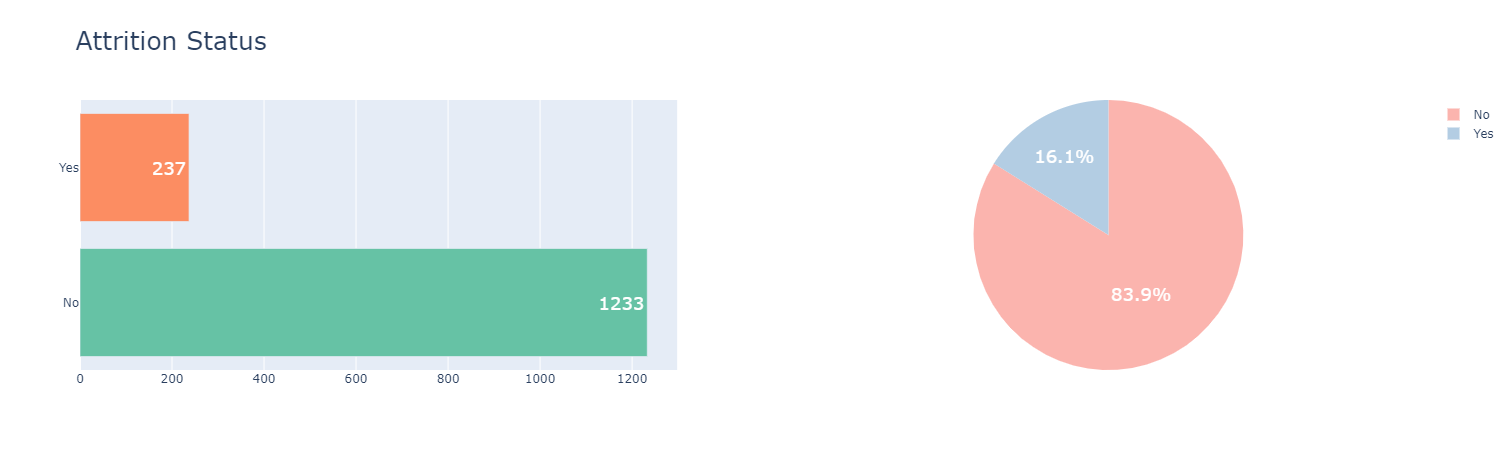

In [15]:
# Create subplots with a bar chart and a pie chart side by side
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]])

# Add horizontal bar chart for Attrition
fig.add_trace(
    go.Bar(y=attrition_counts.index, x=attrition_counts.values, orientation='h',
           marker=dict(color=px.colors.qualitative.Set2), showlegend=False, 
           text=attrition_counts.values, textposition='auto', textfont=dict(size=18, color='white')),
    row=1, col=1
)

# Add pie chart for Attrition
fig.add_trace(
    go.Pie(labels=attrition_counts.index, values=attrition_counts.values,
           marker=dict(colors=px.colors.qualitative.Pastel1),
           textfont=dict(size=18, color='white')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Attrition Status",
    title_font=dict(size=25)
)

# Show the figure
fig.show()

Around `16.12%` of the workforce has left the company, emphasizing the need to analyze and enhance retention strategies

### How many employees  of each gender are currently in the company?

In [16]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Male      882

Female    588

Name: Gender, dtype: int64


The dataset displays a gender distribution imbalance, with 882 males and 588 females, which could impact analysis, decision-making, and representation considerations within the dataset's context.

### What is the gender ratio among our employees ?

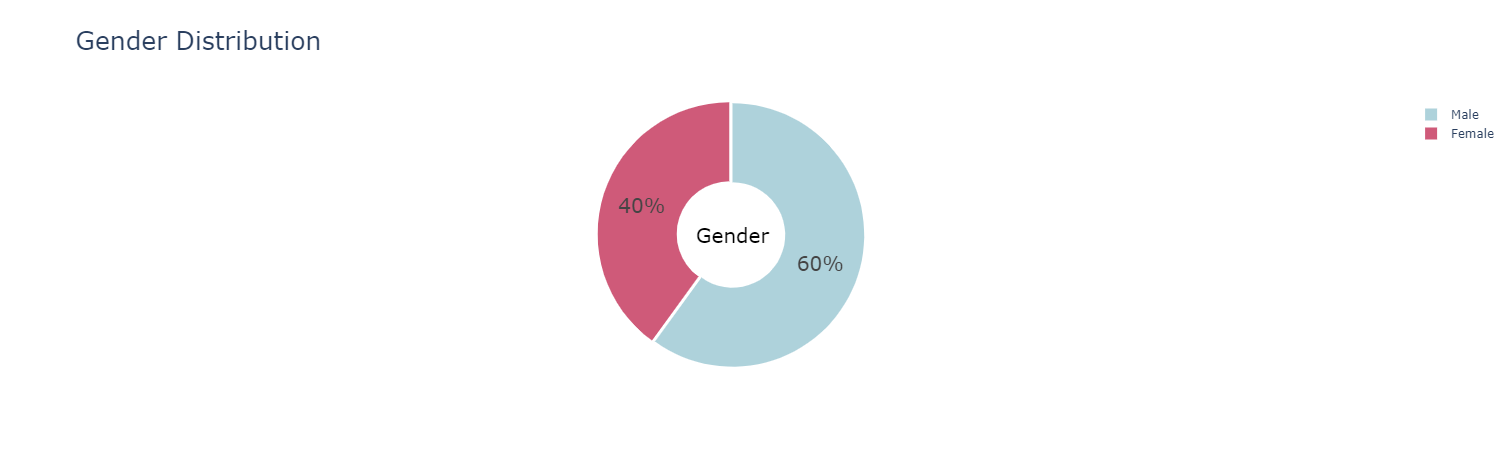

In [17]:
# Values and labels for the pie chart
values = gender_counts.values
labels = gender_counts.index

# Custom colors
colors = ['#AED2DB', '#CF5A79']

# Create the pie chart
fig7 = go.Figure(data=go.Pie(values=values, 
                             labels=labels, hole=0.4,
                             pull=[0, 0.025],
                             marker_colors=colors))

# Update the hover and text info
fig7.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)

# Add annotation for the year
fig7.add_annotation(x=0.5, y=0.5,
                    text='Gender',
                    font=dict(size=20, family='Verdana', color='black'),
                    showarrow=False)

# Update the layout
fig7.update_layout(title_text='Gender Distribution',
                   title_font=dict(size=25, family='Verdana'))

# Show the pie chart
fig7.show()

### What percentage of employees who left the company are male, and what percentage are female?

### How Is Attrition Affected by Gender?

In [18]:
def calculate_percentage_cross_tab(df, x):
    # Create the cross-tabulation
    cross_tab = pd.crosstab(df[x], df['Attrition'])
    
    # Convert counts to percentages
    percentage_cross_tab = cross_tab.apply(lambda row: row / row.sum() * 100, axis=1)
    
    # Round the percentages to two decimal places
    rounded_percentage_cross_tab = percentage_cross_tab.round(2)
    
    return rounded_percentage_cross_tab


In [19]:
calculate_percentage_cross_tab(df, 'Gender')

Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01

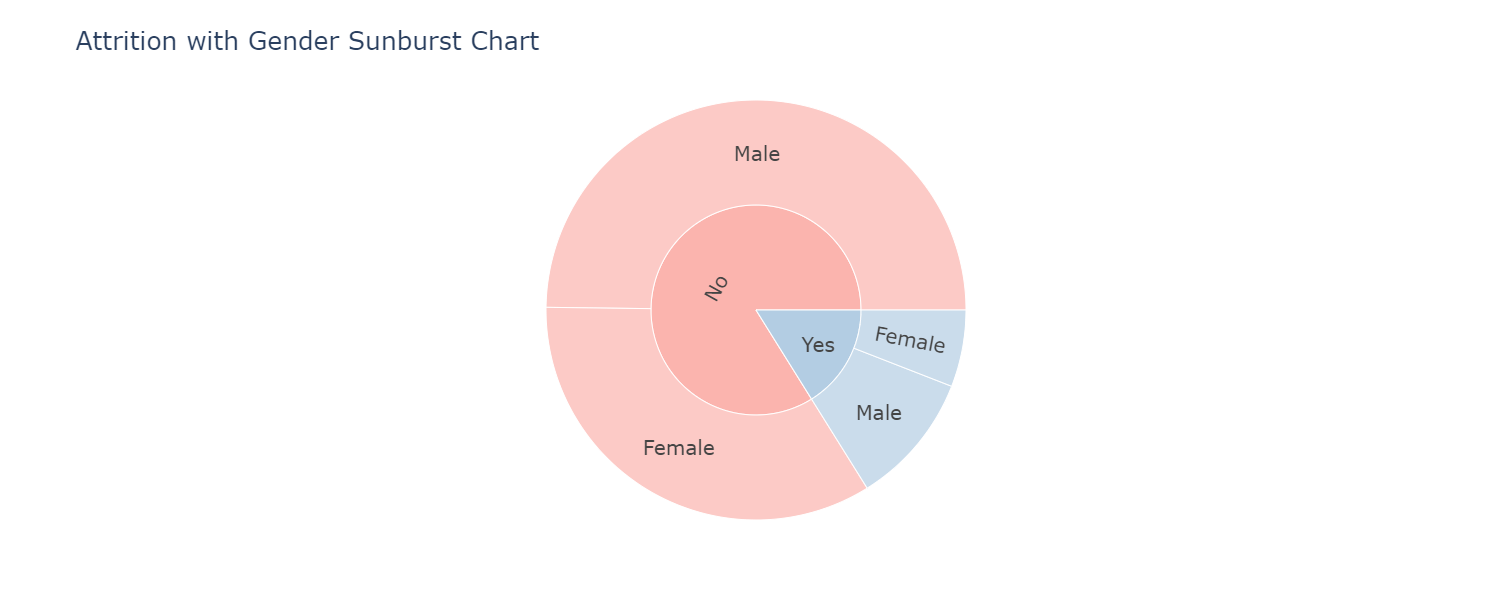

In [20]:
# Create a DataFrame with churn and gender counts
churn_gender_counts = df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count')

# Calculate percentages
churn_gender_counts['Percentage'] = churn_gender_counts['Count'] / churn_gender_counts['Count'].sum() * 100

# Create a sunburst chart using Plotly
fig = px.sunburst(churn_gender_counts, 
                  path=['Attrition', 'Gender'], 
                  values='Count', 
                  title="Attrition with Gender Sunburst Chart",
                  color='Attrition', 
                  color_discrete_sequence=px.colors.qualitative.Pastel1,
                  labels={'Attrition': 'Status'},
                  custom_data=['Percentage'])

fig.update_layout(title_font=dict(size=25, family='Verdana'), 
                  width=800, height=600)

fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata[0]:.2f}%',
                  textfont=dict(size=20, family='Verdana'))

fig.show()

The attrition rates differ slightly based on gender among the employees. The data shows that the attrition rate for female employees is approximately 14.80%, while for male employees, it's around 17.01% compared to the corresponding overall attrition rate in the dataset (16.12%). This suggests that gender might play a minor role in influencing attrition, but other factors are likely more influential in driving employee turnover.

### How does the hourly rate distribution vary by gender and attrition?

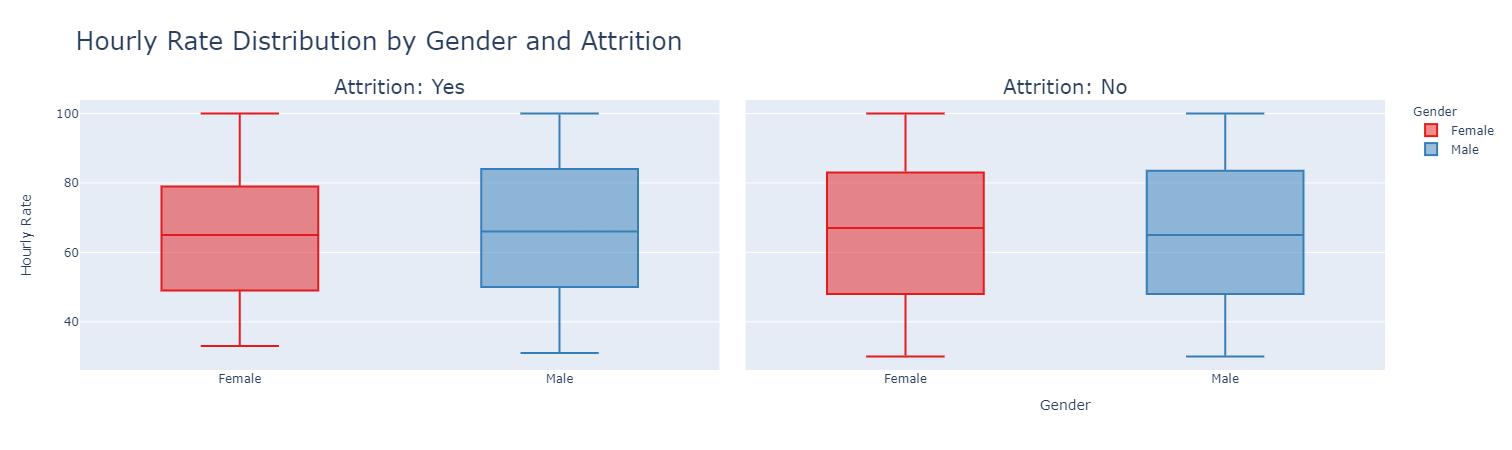

In [21]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="Gender",
    y="HourlyRate",
    color="Gender",
    facet_col="Attrition",
    title="Hourly Rate Distribution by Gender and Attrition",
    labels={"Gender": "Gender", "HourlyRate": "Hourly Rate"},
    color_discrete_sequence=px.colors.qualitative.Set1 
)

# Update facet labels
facet_col_labels = {
    "Yes": "Attrition: Yes",
    "No": "Attrition: No"
}

for i, label in enumerate(facet_col_labels.values()):
    fig.layout.annotations[i].text = label

# Update layout with font properties
fig.update_layout(
    legend_title="Gender",
    xaxis_title=None,
    yaxis_title="Hourly Rate",
    margin=dict(t=100),  # Adjust top margin to accommodate facet labels
    title_font=dict(size=25, family='Verdana'), 
)

# Update font properties of annotations
for annotation in fig.layout.annotations:
    annotation.font = dict(size=20, family='Verdana')

# Show the plot
fig.show()

Our analysis reveals a notable pattern: when attrition is marked as "Yes," men tend to receive higher compensation, whereas in cases where attrition is labeled as "No," male employees receive lower compensation. This data-driven insight underscores that among the individuals who have left our company, females, on average, had a lower median hourly rate compared to their male counterparts.

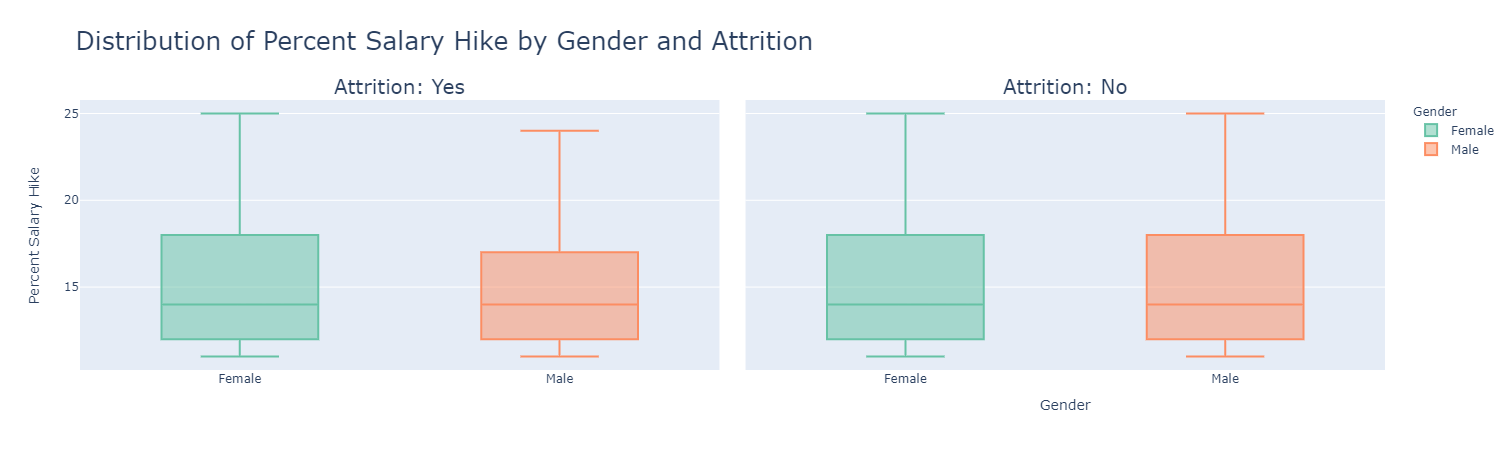

In [22]:
# Create the box plot
fig = px.box(
    data_frame=df,
    x="Gender",
    y="PercentSalaryHike",
    color="Gender",
    facet_col="Attrition",
    title="Distribution of Percent Salary Hike by Gender and Attrition",
    labels={"Gender": "Gender", "PercentSalaryHike": "Percent Salary Hike"},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Update facet labels
facet_col_labels = {
    "Yes": "Attrition: Yes",
    "No": "Attrition: No"
}

for i, label in enumerate(facet_col_labels.values()):
    fig.layout.annotations[i].text = label

# Update layout with font properties
fig.update_layout(
    legend_title="Gender",
    xaxis_title=None,
    yaxis_title="Percent Salary Hike",
    margin=dict(t=100),  # Adjust top margin to accommodate facet labels
    title_font=dict(size=25, family='Verdana'), 
)

# Update font properties of annotations
for annotation in fig.layout.annotations:
    annotation.font = dict(size=20, family='Verdana')

# Show the plot
fig.show()

Interestingly, among those who left the company, it appears that the male employees had a lower average percent salary hike compared to their female counterparts. However, when looking at the current employees, both male and female employees have fairly similar average percent salary hikes. This suggests that there might have been a gender-based discrepancy in salary adjustments among the departed employees, but the situation has since been rectified for the existing workforce.

### What Is the Effect of Age on Attrition?


In [23]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

The company enjoys a diverse age range (18 to 60), bringing varied perspectives and experiences to the workforce.

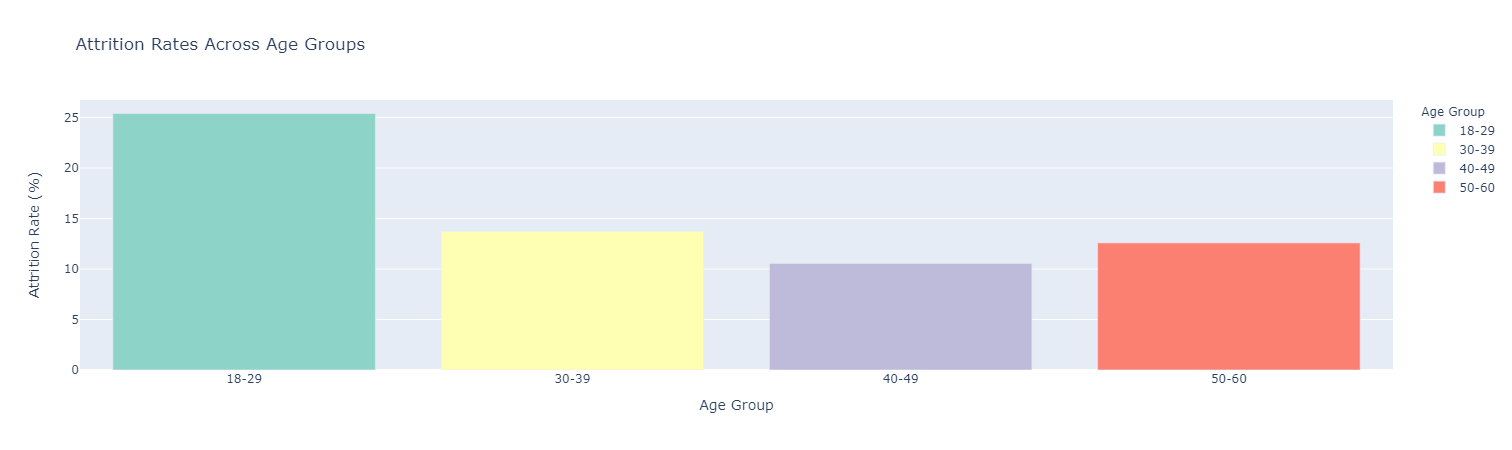

In [24]:
# Define age groups
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-29', '30-39', '40-49', '50-60']

# Create age groups column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group data by age group and Attrition, and calculate attrition rates
attrition_by_age_group = df.groupby(['Age Group', 'Attrition']).size().unstack()
attrition_by_age_group['Attrition Rate'] = attrition_by_age_group['Yes'] / (attrition_by_age_group['Yes'] + attrition_by_age_group['No']) * 100

# Reset index for plotting
attrition_by_age_group = attrition_by_age_group.reset_index()

# Create a bar plot to visualize attrition rates across age groups
fig = px.bar(attrition_by_age_group, x='Age Group', y='Attrition Rate',
             title='Attrition Rates Across Age Groups',
             labels={'Age Group': 'Age Group', 'Attrition Rate': 'Attrition Rate (%)'},
             color='Age Group', color_discrete_sequence=px.colors.qualitative.Set3)

# Show the plot
fig.show()

Youthful Attrition Peaks: Employees aged 18 to 29 exhibit higher attrition rates, possibly due to career exploration or shifting and lower job satisfaction during early career stages.

Stability in Mid-Career: Attrition decreases significantly after age 30, indicating enhanced job stability and loyalty among experienced employees.

Retention Among Seniors: Older employees, especially those above 40, have lower attrition rates, likely due to seniority, job security, and satisfaction.

Age Diversity Benefits: The organization benefits from a wide age range (18 to 60), contributing diverse perspectives and experiences to the workforce.

Age Range Impact: Notably, attrition rates increase among employees aged 50 to 60 compared to those aged 40 to 49. This could be due to retirement decisions among senior employees.

Deep Dive Needed: While age influences attrition, understanding underlying factors like career development and work culture is crucial.



### What role does gender and age play in this workplace?

In [25]:
# Calculate attrition rates by gender and age group
attrition_by_gender_age = df.groupby(['Gender', 'Age Group'])['Attrition'].value_counts(normalize=True).unstack()
attrition_by_gender_age

Attrition               No       Yes
Gender Age Group                    
Female 18-29      0.718310  0.281690
       30-39      0.887550  0.112450
       40-49      0.899225  0.100775
       50-60      0.921875  0.078125
Male   18-29      0.762712  0.237288
       30-39      0.845946  0.154054
       40-49      0.891192  0.108808
       50-60      0.835443  0.164557

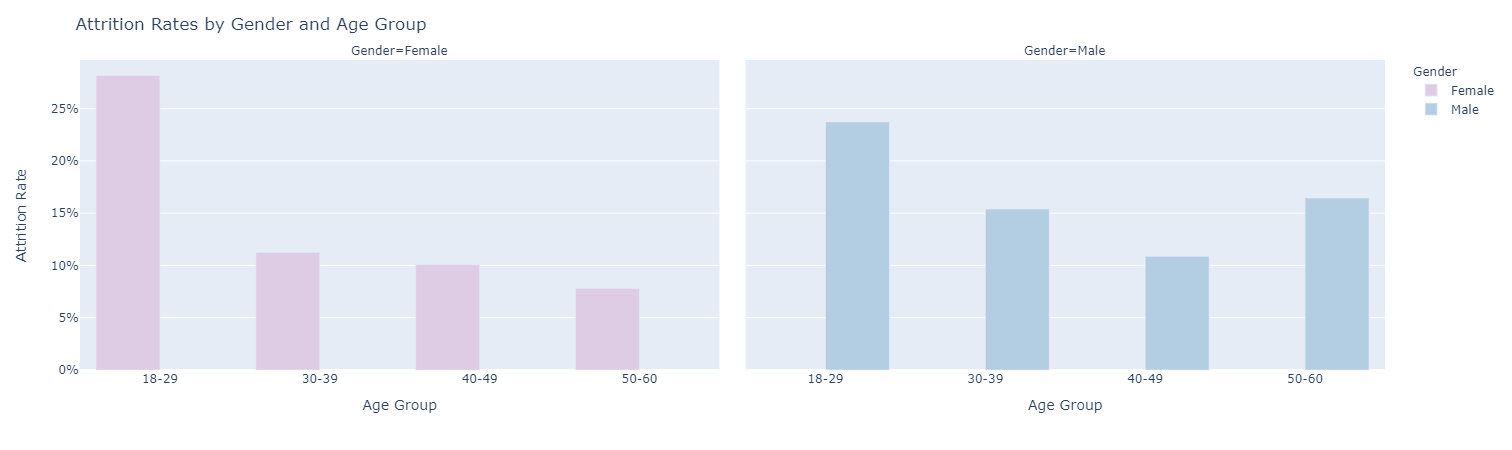

In [26]:
# Plot attrition rates by gender and age group
fig = px.bar(attrition_by_gender_age.reset_index(), 
             x='Age Group', y='Yes', color='Gender', 
             barmode='group', facet_col='Gender',
             color_discrete_sequence=['#DECBE4', '#B3CDE3'],
             labels={'Yes': 'Attrition Rate'})

fig.update_layout(
    title="Attrition Rates by Gender and Age Group",
    xaxis_title="Age Group",
    yaxis_title="Attrition Rate",
    xaxis=dict(type='category'),
    yaxis=dict(tickformat=".0%"),
    showlegend=True
)
fig.show()

- As age increases, attrition rates generally decrease for both genders.
- Female employees in the 18-29 age group exhibit the highest attrition rate (around 28.2%), while male employees in the same age group have an attrition rate of around 23.7%.
- Male employees in the 50-60 age group exhibit the highest attrition rate (around 16.5%), while Female employees in the same age group have an attrition rate of around 8%.

### How is Attrition Affected by business travels?

In [27]:
calculate_percentage_cross_tab(df, 'BusinessTravel')

Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96

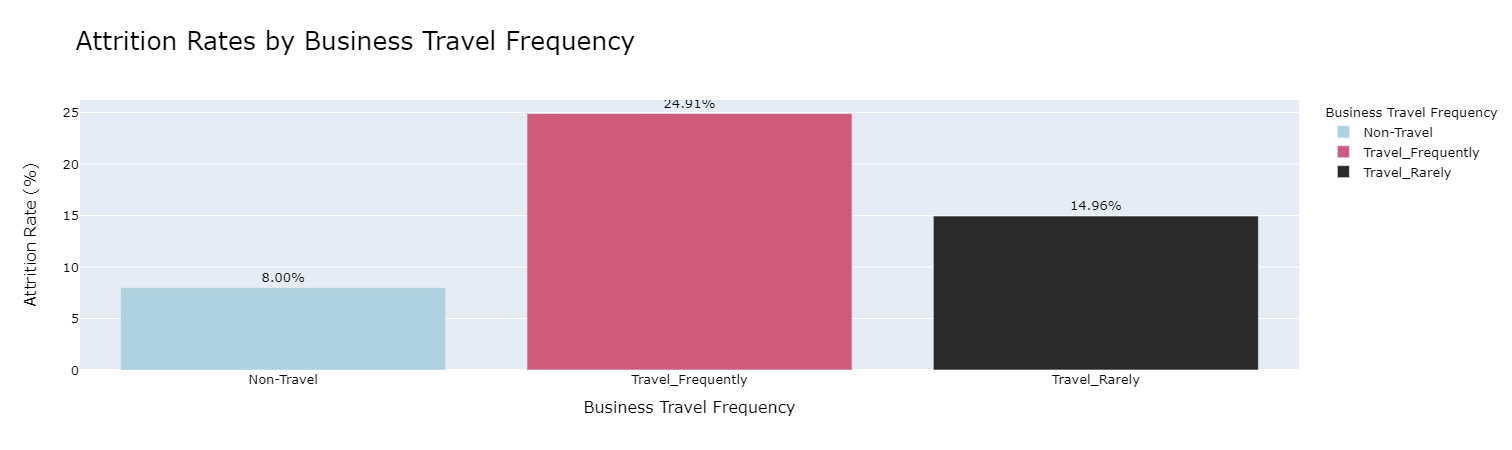

In [28]:
# Group data by BusinessTravel and Attrition, and calculate attrition rates
attrition_by_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
attrition_by_travel['Attrition Rate'] = attrition_by_travel['Yes'] / (attrition_by_travel['Yes'] + attrition_by_travel['No']) * 100

# Reset index for plotting
attrition_by_travel = attrition_by_travel.reset_index()

# Create a bar plot using Plotly with specified title and font styles
fig = px.bar(attrition_by_travel, x='BusinessTravel', y='Attrition Rate',
             color='BusinessTravel', text='Attrition Rate',
             title='Attrition Rates by Business Travel Frequency',
             labels={'BusinessTravel': 'Business Travel Frequency', 'Attrition Rate': 'Attrition Rate (%)'},
             color_discrete_sequence=['#AED2DF', '#CF5A79', '#292929'])

# Add data labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Apply title and font styles
fig.update_layout(
    title=dict(text='Attrition Rates by Business Travel Frequency', 
               font=dict(size=25, family='Verdana')),
    font=dict(size=13, family='Verdana', color='black')
)

# Show the plot
fig.show()

The data highlights that Non-Travel employees have the lowest attrition rate (8%), while Travel_Frequently employees face the highest rate (24.91%). This disparity indicates a potential link between frequent business travel and increased turnover. To address this, the company could introduce measures like improving work-life balance for frequent travelers, offering extra support, and addressing challenges tied to extensive travel. Retention efforts should particularly target Travel_Frequently employees.

### What is effect of the distance from home on attrition ?

In [29]:
# Define distance ranges and labels
distance_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
distance_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Categorize distance into ranges
df['DistanceRange'] = pd.cut(df['DistanceFromHome'], bins=[x[0] for x in distance_ranges] + [float('inf')],
                              labels=distance_labels)

# Group data by distance range and Attrition, and calculate attrition rates
attrition_by_distance = df.groupby(['DistanceRange', 'Attrition']).size().unstack()
attrition_by_distance['Attrition Rate'] = attrition_by_distance['Yes'] / (attrition_by_distance['Yes'] + attrition_by_distance['No']) * 100
attrition_by_distance

Attrition       No  Yes  Attrition Rate
DistanceRange                          
0-5            597   94       13.603473
6-10           310   54       14.835165
11-15           90   28       23.728814
16-20           92   19       17.117117
21-25           92   32       25.806452
26-30           52   10       16.129032

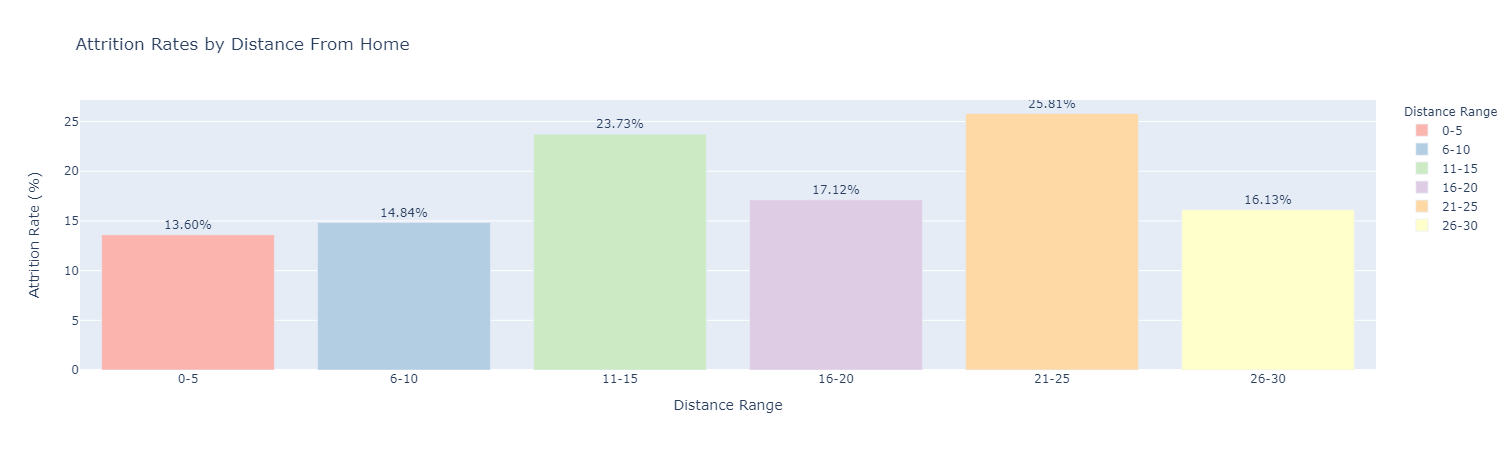

In [30]:
# Define distance ranges and labels
distance_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
distance_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Categorize distance into ranges
df['DistanceRange'] = pd.cut(df['DistanceFromHome'], bins=[x[0] for x in distance_ranges] + [float('inf')],
                              labels=distance_labels)

# Group data by distance range and Attrition, and calculate attrition rates
attrition_by_distance = df.groupby(['DistanceRange', 'Attrition']).size().unstack()
attrition_by_distance['Attrition Rate'] = attrition_by_distance['Yes'] / (attrition_by_distance['Yes'] + attrition_by_distance['No']) * 100

# Reset index for plotting
attrition_by_distance = attrition_by_distance.reset_index()

# Create a bar plot using Plotly
fig = px.bar(attrition_by_distance, x='DistanceRange', y='Attrition Rate',
             color='DistanceRange', text='Attrition Rate',
             title='Attrition Rates by Distance From Home',
             labels={'DistanceRange': 'Distance Range', 'Attrition Rate': 'Attrition Rate (%)'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

# Add data labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the plot
fig.show()


The attrition rate tends to increase with longer distances, with the highest rate in the "21-25" range (25.81%) and the lowest in the "6-10" range (14.84%). An intriguing disparity arises as the "11-15" range (23.73%) experiences higher attrition than the slightly longer "16-20" range (17.12%), suggesting additional factors influencing departures.

### Which business unit faces the attrition problem?

### What is the most Department of attritions ?

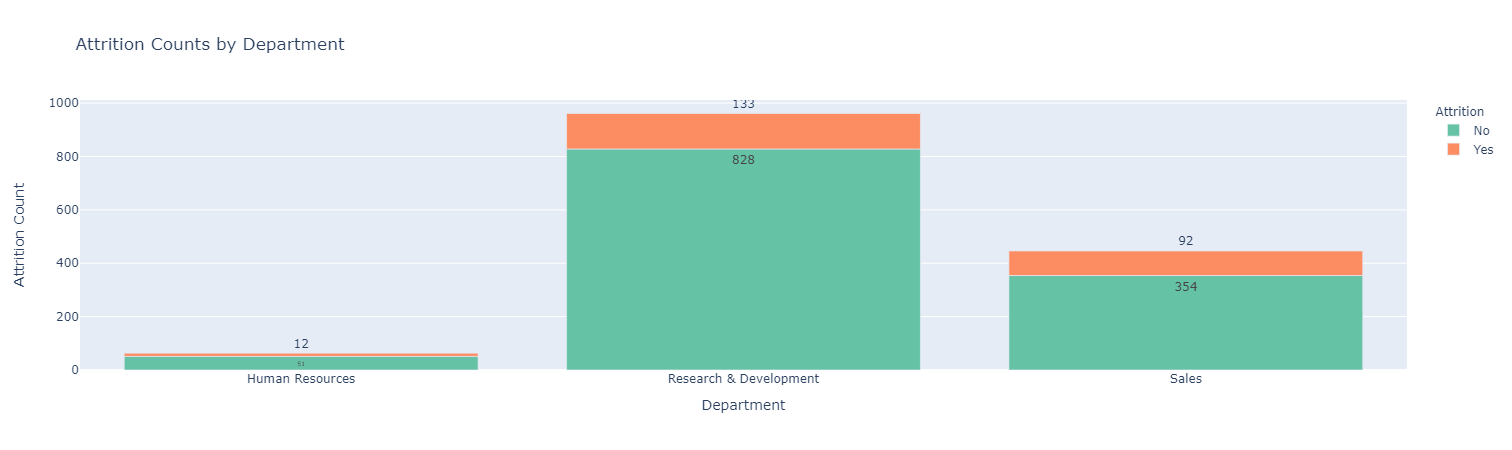

In [31]:
# Group data by Department and Attrition, and calculate attrition counts
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack()

# Reset index for plotting
attrition_by_department = attrition_by_department.reset_index()

# Melt the DataFrame for plotting
attrition_by_department_melted = pd.melt(attrition_by_department, id_vars='Department', value_vars=['No', 'Yes'],
                                         var_name='Attrition', value_name='Count')

# Create a bar plot using Plotly
fig = px.bar(attrition_by_department_melted, x='Department', y='Count',
             color='Attrition', text='Count',
             title='Attrition Counts by Department',
             labels={'Department': 'Department', 'Count': 'Attrition Count'},
             color_discrete_sequence=px.colors.qualitative.Set2)

# Add data labels to the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the plot
fig.show()

we can see that most employees who have left worked for the Research & Development department

### Does the Department of Work Impact Attrition?

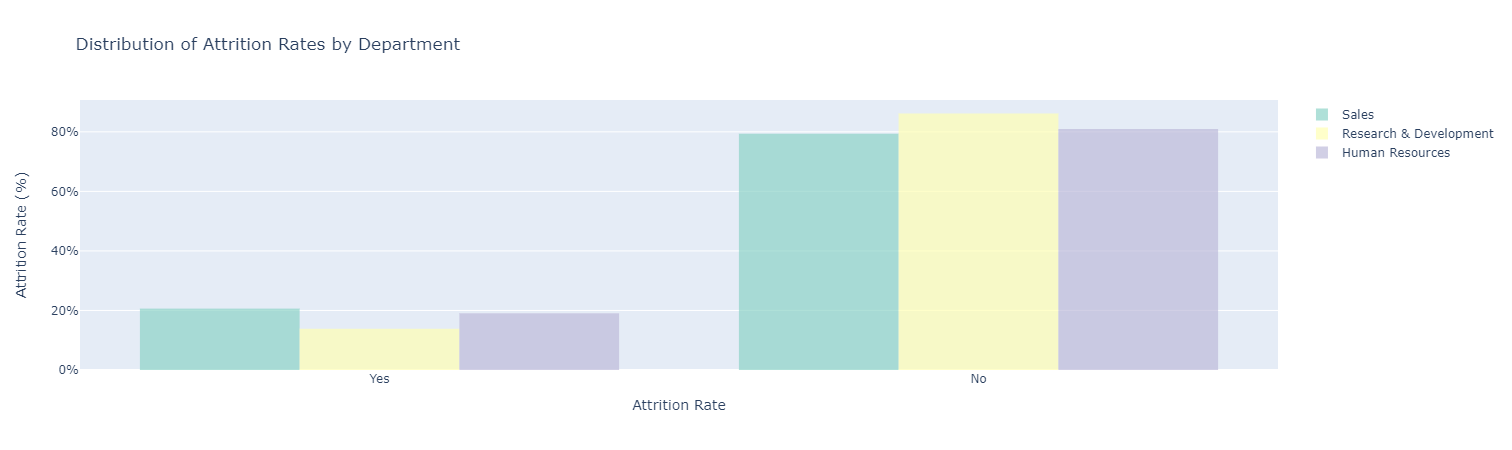

In [32]:
# Group data by Department and Attrition, and calculate attrition rates
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack()
attrition_by_department['Attrition Rate'] = attrition_by_department['Yes'] / (attrition_by_department['Yes'] + attrition_by_department['No']) * 100

# Reset index for plotting
attrition_by_department = attrition_by_department.reset_index()

# Create KDE plots using Seaborn and Plotly
kde_data = [df[df['Department'] == department]['Attrition'] for department in df['Department'].unique()]
kde_labels = df['Department'].unique()
kde_traces = []
color_discrete_sequence = px.colors.qualitative.Set3  # Choose the desired color palette

for data, label, color in zip(kde_data, kde_labels, color_discrete_sequence):
    trace = go.Histogram(x=data, name=label, opacity=0.7, histnorm='probability density', marker_color=color)
    kde_traces.append(trace)

kde_layout = go.Layout(title='Distribution of Attrition Rates by Department',
                       xaxis=dict(title='Attrition Rate'),
                       yaxis=dict(title='Attrition Rate (%)', tickformat=".0%"))

kde_fig = go.Figure(data=kde_traces, layout=kde_layout)

# Show the KDE plot
kde_fig.show()

When analyzing the impact of employee turnover, it becomes evident that the Sales department bears the greatest brunt, closely trailed by the Human Resources department, and subsequently, the Research & Development department. Although the Research & Development department witnesses the highest number of departures, its substantial total workforce mitigates the effects of such attrition, setting it apart from other divisions with fewer personnel, making them more susceptible to the ramifications of staff fluctuations.






### What variety of job roles exist within the company?

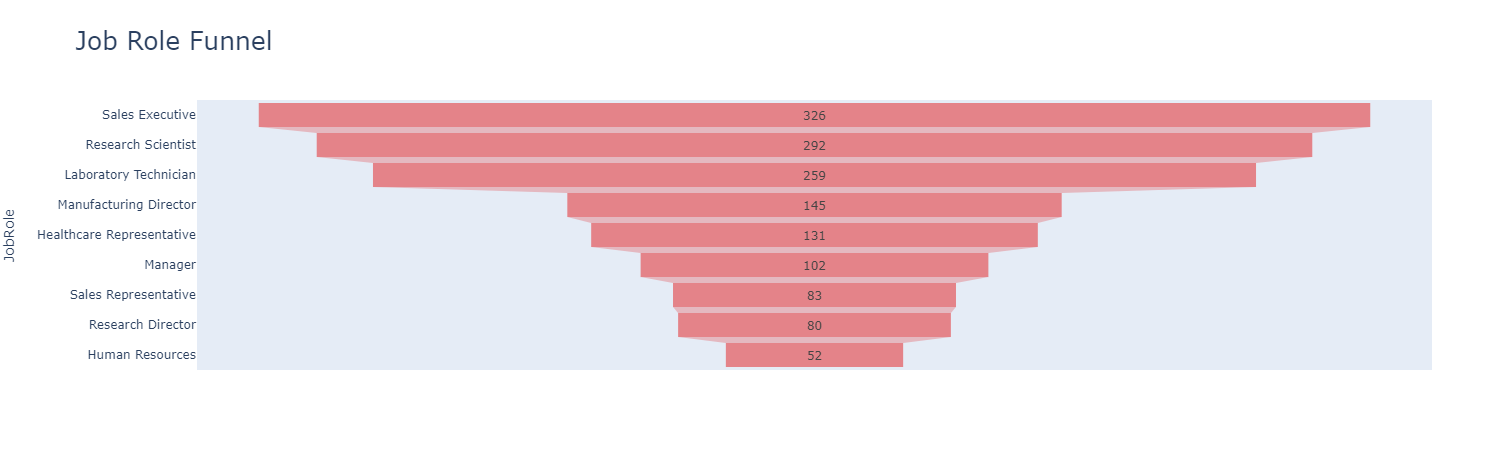

In [33]:
# Calculate value counts for JobRole column
jobrole_value_counts = df['JobRole'].value_counts().reset_index()
jobrole_value_counts.columns = ['JobRole', 'Count']

# Define a custom color scale with red tones
red_tones = ['#E48389']

# Create funnel charts with the specified design
fig_jobrole = px.funnel(jobrole_value_counts, x='Count', y='JobRole', title='Job Role Funnel', color_discrete_sequence=red_tones)

# Apply design changes
fig_jobrole.update_layout(
    title_font=dict(size=25, family='Verdana'))

# Show the charts
fig_jobrole.show()


Roles like "Sales Executive" and "Research Scientist" have the most people, showing they're really important for the company. There are also lots of people in technical jobs like "Laboratory Technician" and "Manufacturing Director," which help the company run smoothly. The "Manager" roles are also a big part of the company. The different jobs, including special ones like "Healthcare Representative" and "Human Resources," show that the company does many different things. It's clear that sales are a big deal because there are many roles related to selling. Additionally, jobs that focus on research, like "Research Scientist" and "Research Director," tell us that the company spends a lot of effort on improving and creating new things.

### Which job roles did the majority of those who departed the company hold?

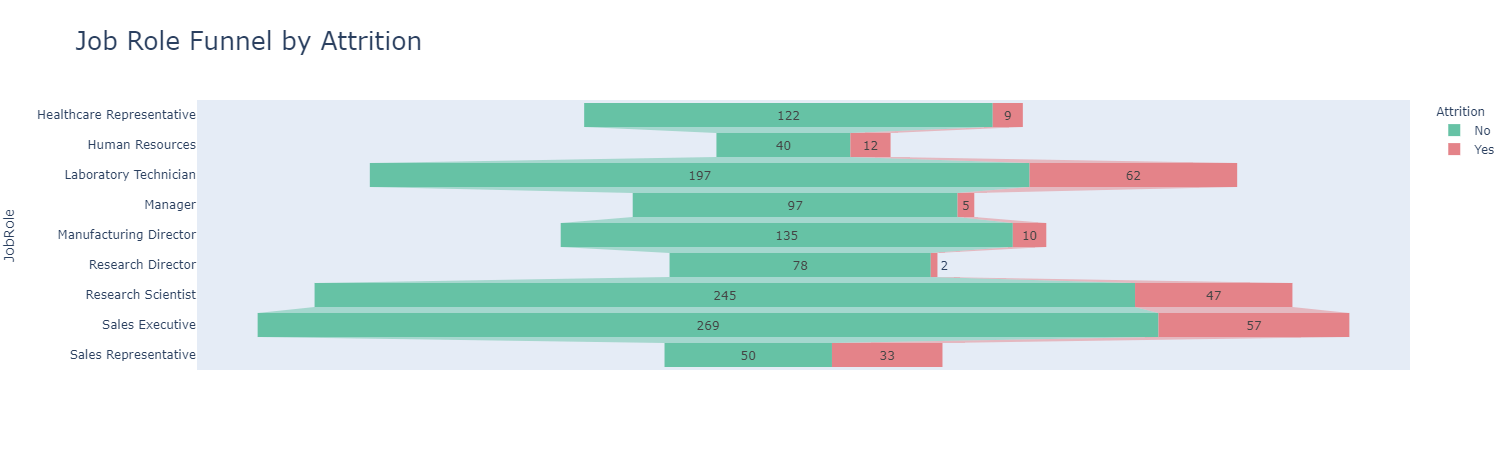

In [34]:
# Calculate value counts for JobRole column
jobrole_attrition_counts = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

# Define custom color scales for each category
colors = {'Yes': '#E48389', 'No': '#66C2A5'}

# Create funnel charts with the specified design
fig_jobrole_attrition = px.funnel(jobrole_attrition_counts, 
                                  x='Count', 
                                  y='JobRole', 
                                  color='Attrition',
                                  color_discrete_map=colors,
                                  title='Job Role Funnel by Attrition')

# Apply design changes
fig_jobrole_attrition.update_layout(
    title_font=dict(size=25, family='Verdana'))

# Show the chart
fig_jobrole_attrition.show()

The majority of employees experiencing attrition belong to roles like laboratory technicians, sales executives, or research scientists. This observation highlights the significance of understanding the reasons behind attrition in these specific job roles and implementing targeted measures to improve retention.

### What is the most job role of attritions ?

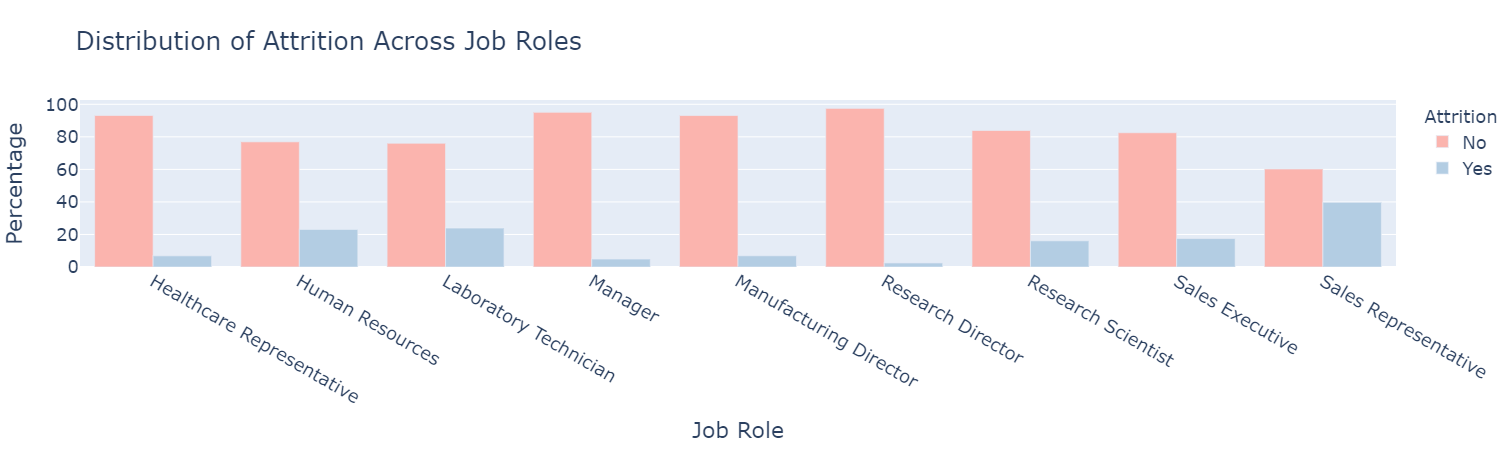

In [35]:
# Group data by JobRole and Attrition, and calculate counts and percentages
grouped = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')
grouped['Percentage'] = (grouped['Count'] / grouped.groupby('JobRole')['Count'].transform('sum') * 100).round(2)
colors_palette = px.colors.qualitative.Pastel1

fig = px.bar(
    grouped, 
    x='JobRole', 
    y='Percentage', 
    color='Attrition',
    title='Distribution of Attrition Across Job Roles',
    labels={'JobRole': 'Job Role', 'Percentage': 'Attrition Percentage'},
    color_discrete_sequence=colors_palette,
    barmode='group'  # Set the bar mode to grouped
)

fig.update_layout(
    xaxis_title='Job Role',
    yaxis_title='Percentage',
    showlegend=True,
    font=dict(size=18)  # Set the font size here
)

fig.show()

The predominant positions that saw departures were sales Representative, laboratory technicians,Human Resources,sales Executive, and research scientists.

### I'm curious about the performance levels of the employees who departed!

In [36]:
df['PerformanceRating'].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [37]:
# Calculate the percentage of each performance rating
performance_percentage = df['PerformanceRating'].value_counts(normalize=True) * 100
performance_percentage

Excellent      84.62585
Outstanding    15.37415
Name: PerformanceRating, dtype: float64

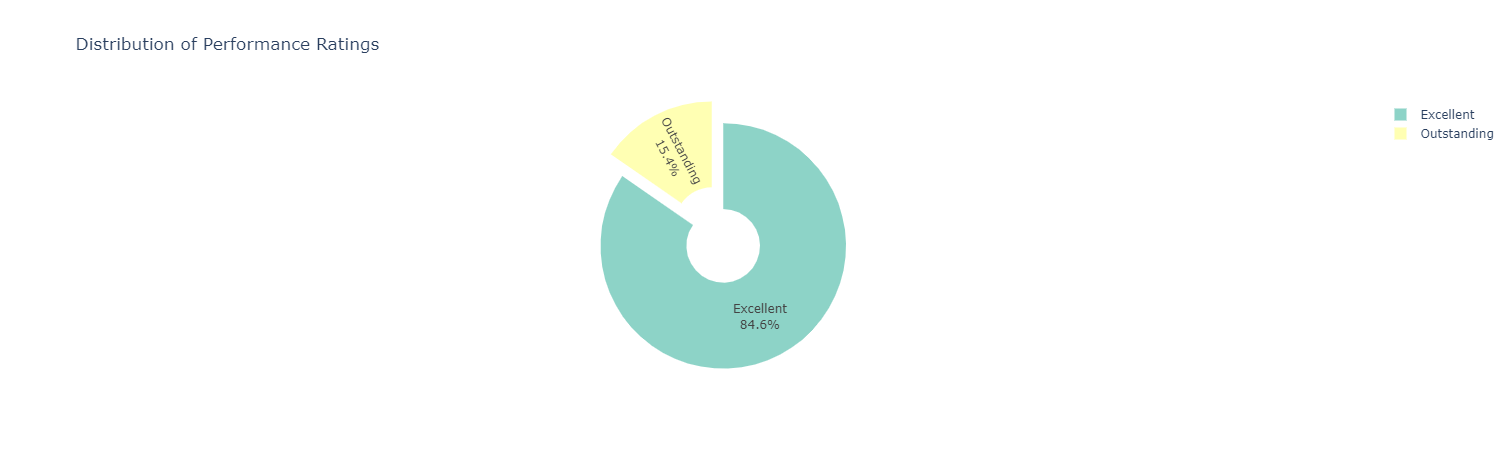

In [38]:
# Create a pie chart with custom design using Plotly
fig = px.pie(values=performance_percentage, names=performance_percentage.index, 
             title='Distribution of Performance Ratings',
             color_discrete_sequence=px.colors.qualitative.Set3,  # Custom color palette
             labels={'names': 'Performance Rating', 'values': 'Percentage'},
             hole=0.3,  # Set the center hole size for a donut chart
             )

# Customize layout
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])  # Add percentage and labels

# Show the Plotly figure
fig.show()


The company boasts a significantly larger workforce in the "Excellent" performance category compared to the "Outstanding" category, with a notable difference of 84.63% for "Excellent" and 15.37% for "Outstanding".

In [39]:
calculate_percentage_cross_tab(df, 'PerformanceRating')

Attrition             No    Yes
PerformanceRating              
Excellent          83.92  16.08
Outstanding        83.63  16.37

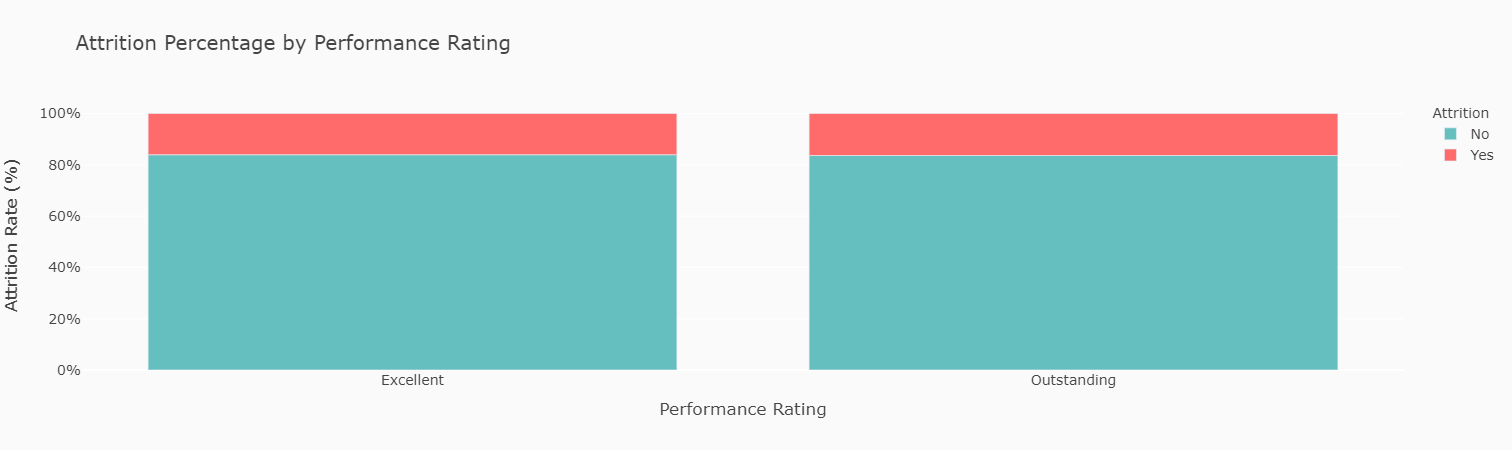

In [40]:
# Calculate percentages
percentage_data = df.groupby(['PerformanceRating', 'Attrition']).size() / df.groupby('PerformanceRating').size()
percentage_data = percentage_data.reset_index(name='Percentage')

# Set the color palette
colors = ['#66BFBF', '#FF6B6B']  # Custom color palette

# Create Plotly bar chart
fig = px.bar(
    percentage_data, 
    x='PerformanceRating', 
    y='Percentage', 
    color='Attrition',
    title='Attrition Percentage by Performance Rating',
    labels={'PerformanceRating': 'Performance Rating', 'Percentage': 'Attrition Percentage'},
    color_discrete_sequence=colors,  # Use the custom color palette
)

# Update the layout for better aesthetics
fig.update_layout(
    xaxis_title='Performance Rating',
    yaxis_title='Attrition Percentage',
    showlegend=True,
    legend_title='Attrition',
    font=dict(size=14, color='#444444'),  # Adjust font size and color
    plot_bgcolor='#FAFAFA',  # Set plot background color
    paper_bgcolor='#FAFAFA',  # Set paper (outside plot area) background color
    yaxis=dict(title='Attrition Rate (%)', tickformat=".0%")
)

# Show the plot
fig.show()


All employees in the company are highly skilled, so it's not ideal for the company to lose such valuable talents, as they are difficult to replace.


The attrition rate among employees with an "Excellent" performance rating is approximately the same as the attrition rate among those with an "Outstanding" rating. This is despite the fact that there are significantly more employees with an "Excellent" rating compared to "Outstanding." In other words, the higher number of employees with "Excellent" ratings does not significantly impact the attrition rate, highlighting that performance ratings might not be a predictor of attrition.


### Do Education Field play a role?

### Which Education Field is more likely to leave?

### Are more educated people more likely to leave?

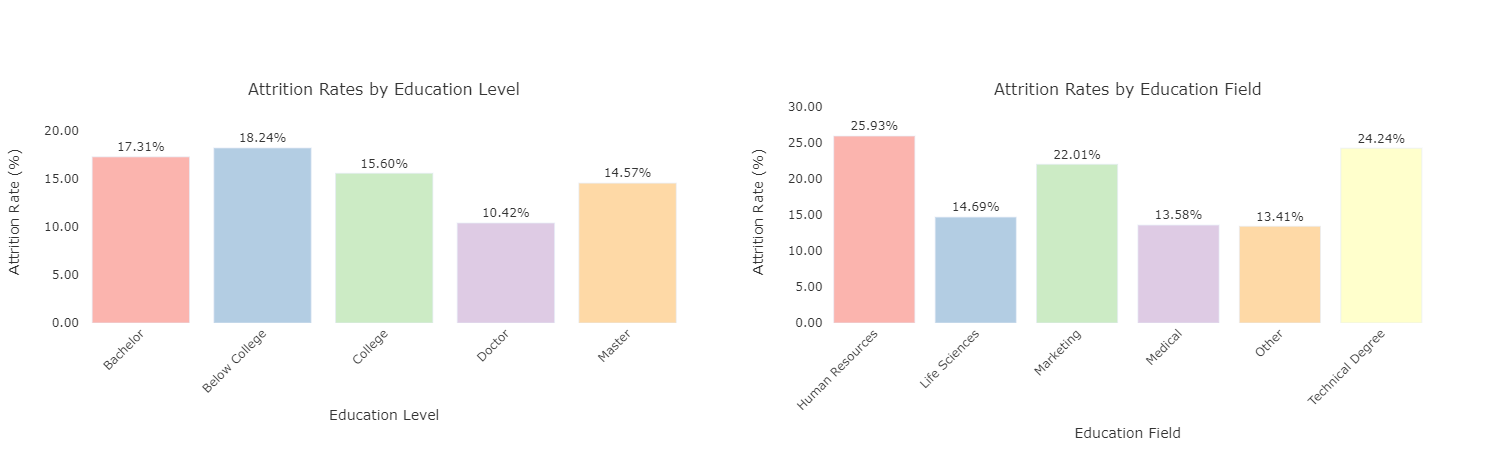

In [41]:
# Calculate attrition rates by education level
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack()

# Calculate attrition rates by education field
attrition_by_field = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack()

# Create a subplot grid with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Attrition Rates by Education Level", "Attrition Rates by Education Field"))

# Add the first subplot - Attrition Rates by Education Level
fig.add_trace(
    go.Bar(
        x=attrition_by_education.reset_index()['Education'],
        y=attrition_by_education['Yes'] * 100,  # Convert to percentage
        marker_color=px.colors.qualitative.Pastel1,
        text=attrition_by_education['Yes'].apply(lambda x: f'{x:.2%}'),
        textposition='outside'
    ),
    row=1, col=1
)

# Add the second subplot - Attrition Rates by Education Field
fig.add_trace(
    go.Bar(
        x=attrition_by_field.reset_index()['EducationField'],
        y=attrition_by_field['Yes'] * 100,  # Convert to percentage
        marker_color=px.colors.qualitative.Pastel1,
        text=attrition_by_field['Yes'].apply(lambda x: f'{x:.2%}'),
        textposition='outside'
    ),
    row=1, col=2
)

# Update layout for the first subplot
fig.update_xaxes(title_text="Education Level", row=1, col=1, tickangle=-45)  # Rotate x-axis labels
fig.update_yaxes(title_text="Attrition Rate (%)", tickformat=".2f%", row=1, col=1)
fig.update_layout(yaxis=dict(range=[0, max(attrition_by_education['Yes'] * 100) + 5]))  # Adjust y-axis range

# Update layout for the second subplot
fig.update_xaxes(title_text="Education Field", row=1, col=2, tickangle=-45)  # Rotate x-axis labels
fig.update_yaxes(title_text="Attrition Rate (%)", tickformat=".2f%", row=1, col=2)
fig.update_layout(yaxis2=dict(range=[0, max(attrition_by_field['Yes'] * 100) + 5]))  # Adjust y-axis range

# Update layout for the entire figure
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',# Set plot background color
    paper_bgcolor='white',# Set paper background color
    font_color='#333333',# Set font color
    title_font_size=24,# Set title font size
    title_font_color='#444444',# Set title font color
    margin=dict(t=100)  # Add space between titles and plots
)

# Display the figure
fig.show()


Most of them had a Below College and their education field was mostly either Human Resources , Technical Degree and Marketing.


### Are Managers a Reason for Resignations?

### what is effect of YearsWithCurrManager on attrition ?

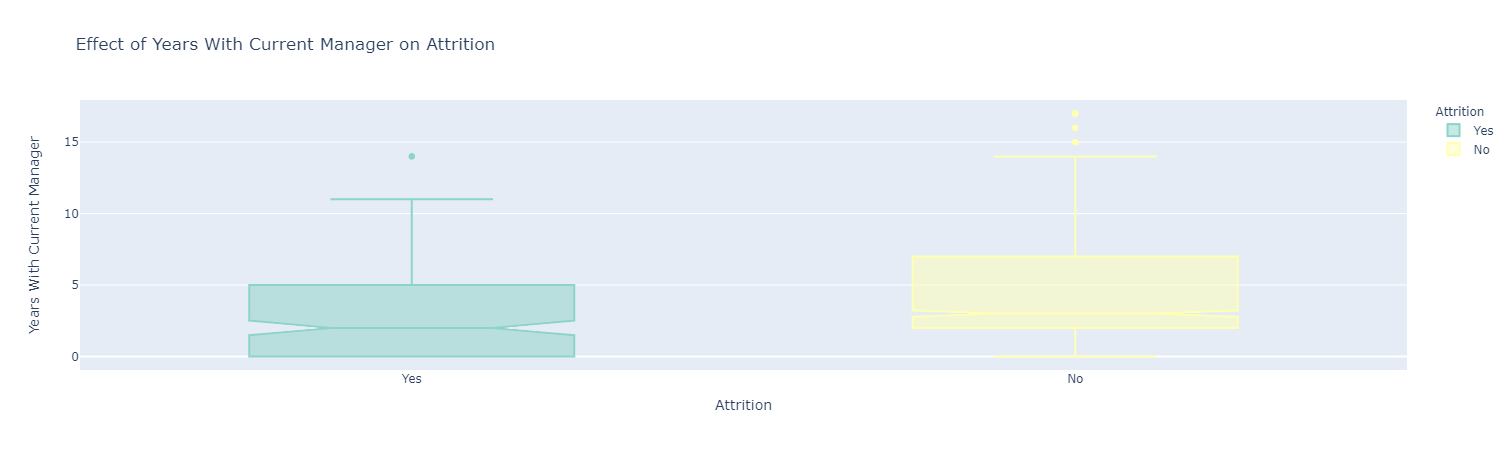

In [42]:
# Set the custom color palette
color_palette = px.colors.qualitative.Set3 

# Create the box plot
fig = px.box(df, x='Attrition', y='YearsWithCurrManager',
             color='Attrition',
             color_discrete_sequence=color_palette,  # Set the custom color palette
             labels={'Attrition': 'Attrition', 'YearsWithCurrManager': 'Years With Current Manager'},
             title='Effect of Years With Current Manager on Attrition',
             notched=True)  # Adding the notched parameter

# Show the plot
fig.show()


Managers indeed have a significant impact on attrition, as a considerable proportion of employees have departed after a very short tenure within the company.

### Is Income the Main Factor for Employee Attrition?

### Is salary is one of the main reasons?

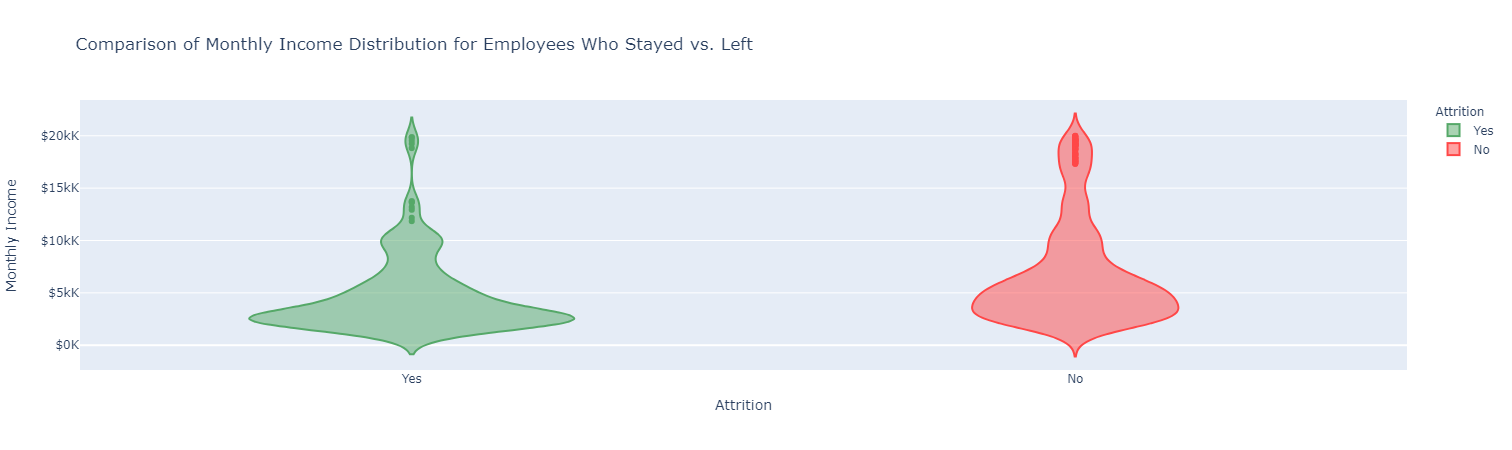

In [43]:
# Define a custom color palette
custom_palette = ['#55A868', '#FF4747']

# Create a violin plot using Plotly with the custom color palette
fig = px.violin(df, x='Attrition', y='MonthlyIncome',
                color='Attrition',
                title='Comparison of Monthly Income Distribution for Employees Who Stayed vs. Left',
                labels={'Attrition': 'Attrition', 'MonthlyIncome': 'Monthly Income'},
                color_discrete_sequence=custom_palette)

# Set the y-axis labels to show currency format
fig.update_layout(yaxis_tickprefix='$', yaxis_ticksuffix='K')

# Show the plot
fig.show()


A significant number of individuals who departed the company exhibited a correlation with lower salary levels. This noteworthy insight underscores the potential influence of compensation on attrition rates

### How much does income matter?

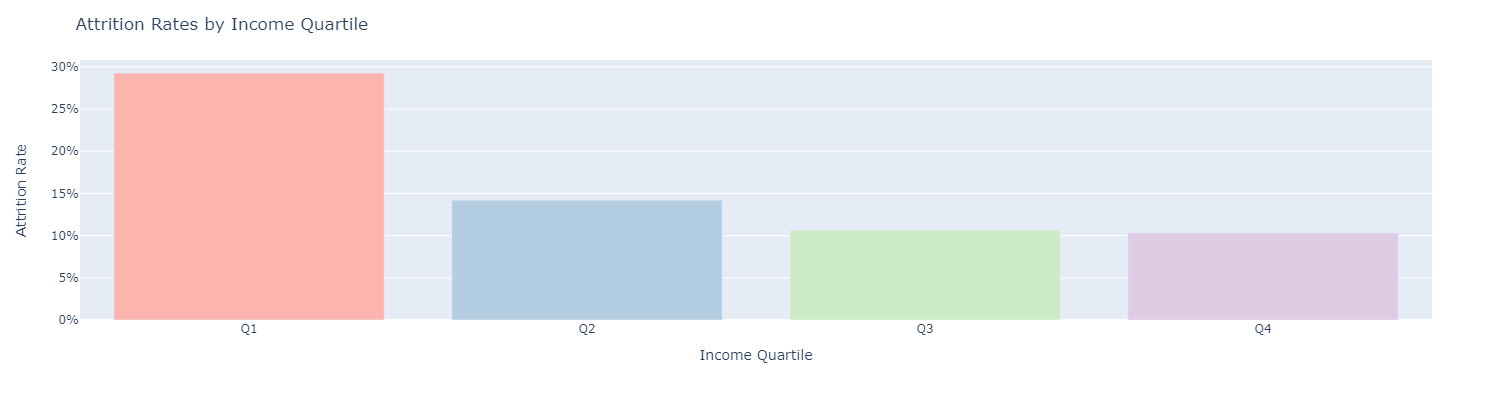

In [44]:
# Calculate attrition rates by income quartiles
income_quartiles = pd.qcut(df['MonthlyIncome'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['Income Quartile'] = income_quartiles

attrition_by_income = df.groupby('Income Quartile')['Attrition'].value_counts(normalize=True).unstack()

# Plot attrition rates by income quartile
fig = px.bar(attrition_by_income.reset_index(), 
             x='Income Quartile', y='Yes', 
             color='Income Quartile',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             labels={'Yes': 'Attrition Rate'},
             height=400, width=800)

fig.update_layout(
    title="Attrition Rates by Income Quartile",
    xaxis_title="Income Quartile",
    yaxis_title="Attrition Rate",
    xaxis=dict(type='category'),
    yaxis=dict(tickformat=".0%"),
    showlegend=False
)
fig.show()

As income quartiles increase from Q1 to Q4, attrition rates decrease, suggesting that higher-income employees are more likely to remain with the company. This emphasizes the importance of competitive compensation in retaining talent. To mitigate attrition, organizations could tailor retention strategies based on income quartiles, addressing specific needs. 

### Does Overtime Stress Employees and Lead to Attrition?

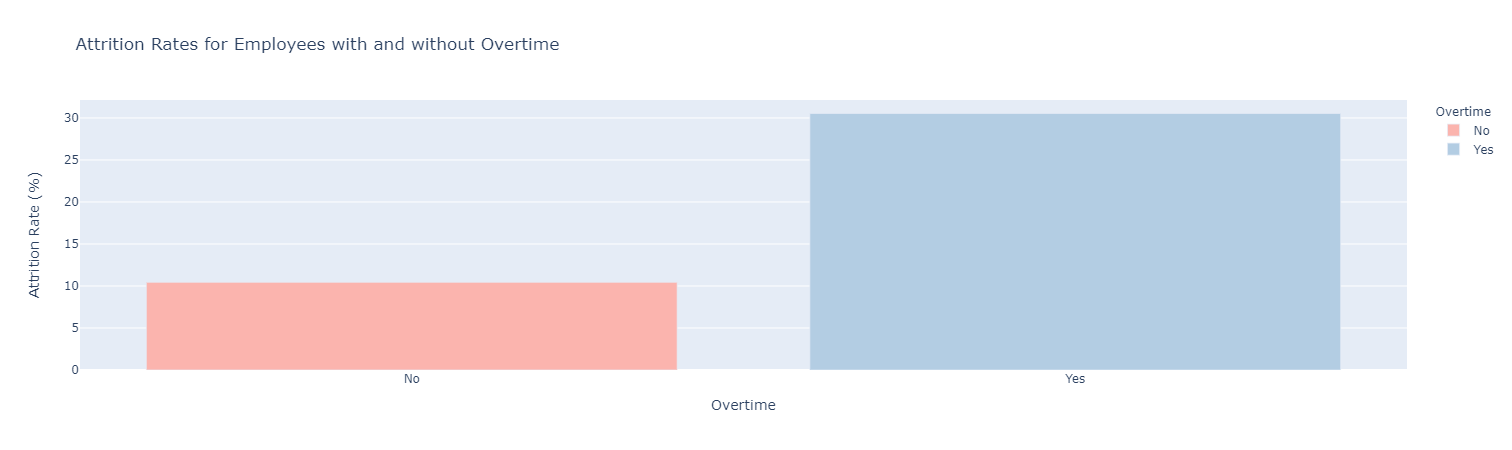

In [45]:
# Group data by OverTime and Attrition, and calculate attrition rates
attrition_by_overtime = df.groupby(['OverTime', 'Attrition']).size().unstack()
attrition_by_overtime['Attrition Rate'] = (attrition_by_overtime['Yes'] / (attrition_by_overtime['Yes'] + attrition_by_overtime['No']) * 100).round(2)

# Reset index for plotting
attrition_by_overtime = attrition_by_overtime.reset_index()

# Create a bar plot to compare attrition rates for employees with and without overtime
color_palette = px.colors.qualitative.Pastel1  # Change this to your preferred palette

fig = px.bar(attrition_by_overtime, x='OverTime', y='Attrition Rate',
             title='Attrition Rates for Employees with and without Overtime',
             labels={'OverTime': 'Overtime', 'Attrition Rate': 'Attrition Rate (%)'},
             color='OverTime', color_discrete_sequence=color_palette)

# Show the plot
fig.show()

The data reveals a substantial difference in attrition rates based on overtime status. Employees who work overtime exhibit a significantly higher attrition rate (30.53%) compared to their counterparts without overtime (10.44%). This stark contrast suggests that overtime work could be a key driver of employee dissatisfaction and departure. Companies should recognize the potential impact of burnout and work-life balance issues on attrition rates among those with overtime responsibilities. Strategies aimed at managing workload, promoting job satisfaction, and fostering a supportive work environment could be pivotal in addressing this attrition trend and retaining valuable talent.

### How Does Job Involvement level Impact Attrition?

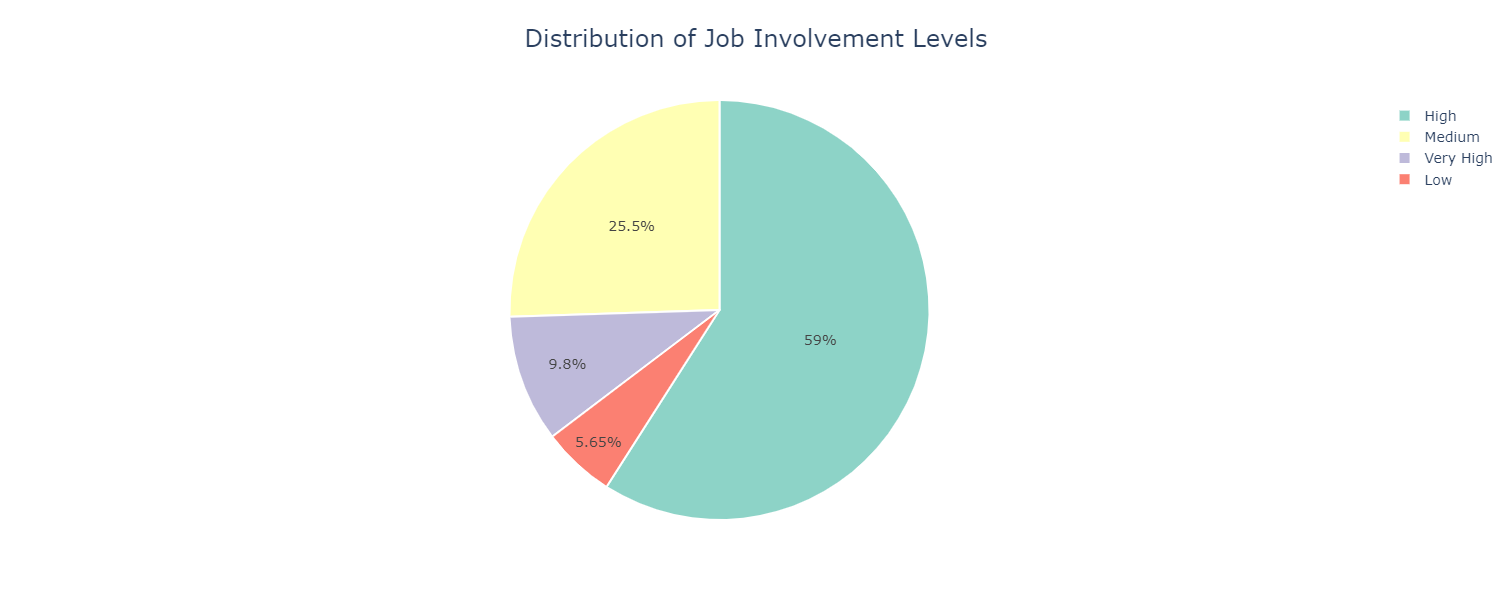

In [46]:
# Count the occurrences of each Job Involvement level
job_involvement_counts = df['JobInvolvement'].value_counts()

# Choose a color palette
color_discrete_sequence = px.colors.qualitative.Set3  # You can change this to any of the specified palettes

fig = go.Figure(data=[go.Pie(
    labels=job_involvement_counts.index,
    values=job_involvement_counts.values,
    textfont_size=14,
    marker=dict(
        colors=color_discrete_sequence,  # Use the chosen color palette here
        line=dict(color='#FFFFFF', width=2)  # Add white border around the slices
    )
)])

fig.update_layout(
    title={
        'text': 'Distribution of Job Involvement Levels',
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 24}
    },
    font={'size': 14},
    width=800,
    height=600
)

fig.show()

The analysis of job involvement levels provides intriguing insights. A significant portion of employees demonstrate high engagement, indicating strong commitment. Meanwhile, a considerable number exhibit medium involvement, striking a balance. Notably, some individuals display exceptional dedication, showcasing very high job involvement. On the other hand, a smaller group shows low engagement, warranting attention. Overall, these patterns highlight the significance of nurturing robust job involvement for enhanced workplace satisfaction and productivity.

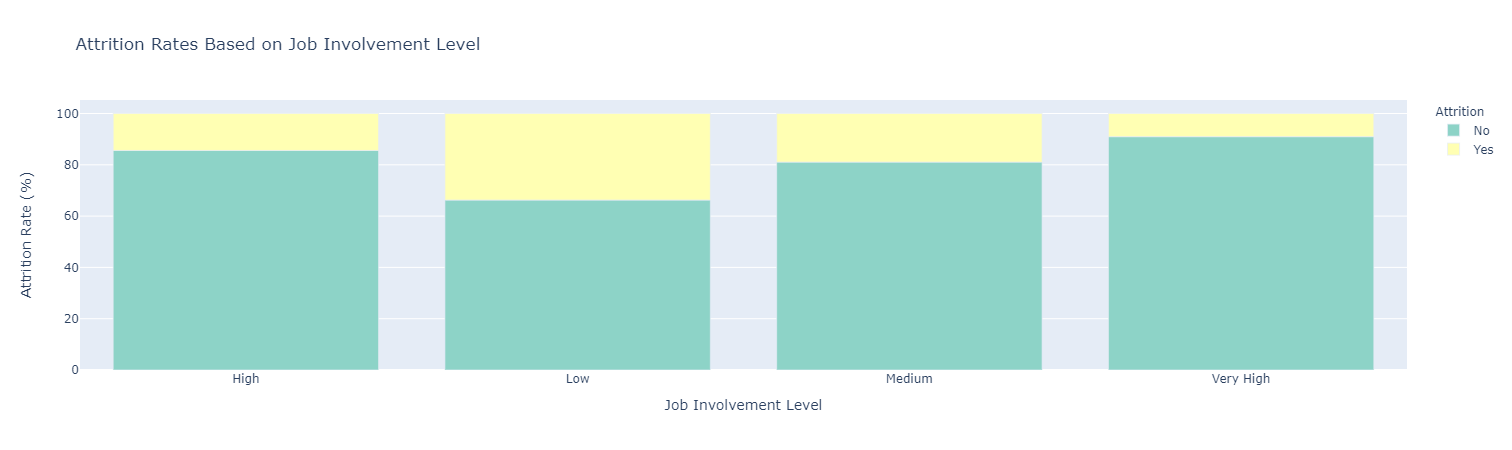

In [47]:
# Group data by JobInvolvement and calculate attrition rates
attrition_by_involvement = df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_involvement['Yes'] = attrition_by_involvement['Yes'] * 100
attrition_by_involvement['No'] = attrition_by_involvement['No'] * 100

# Convert to long format for Plotly
attrition_by_involvement_long = pd.melt(attrition_by_involvement, id_vars=['JobInvolvement'], value_vars=['No', 'Yes'], 
                                         var_name='Attrition', value_name='AttritionRate')

# Create a bar plot using Plotly
fig = px.bar(attrition_by_involvement_long, x='JobInvolvement', y='AttritionRate', color='Attrition', 
             title='Attrition Rates Based on Job Involvement Level',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Set3 color palette

# Customize the layout
fig.update_layout(xaxis_title='Job Involvement Level', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

It is evident that there exists a notable correlation between lower levels of job involvement and higher attrition percentages.

### How Does Environment Satisfaction Impact Attrition?

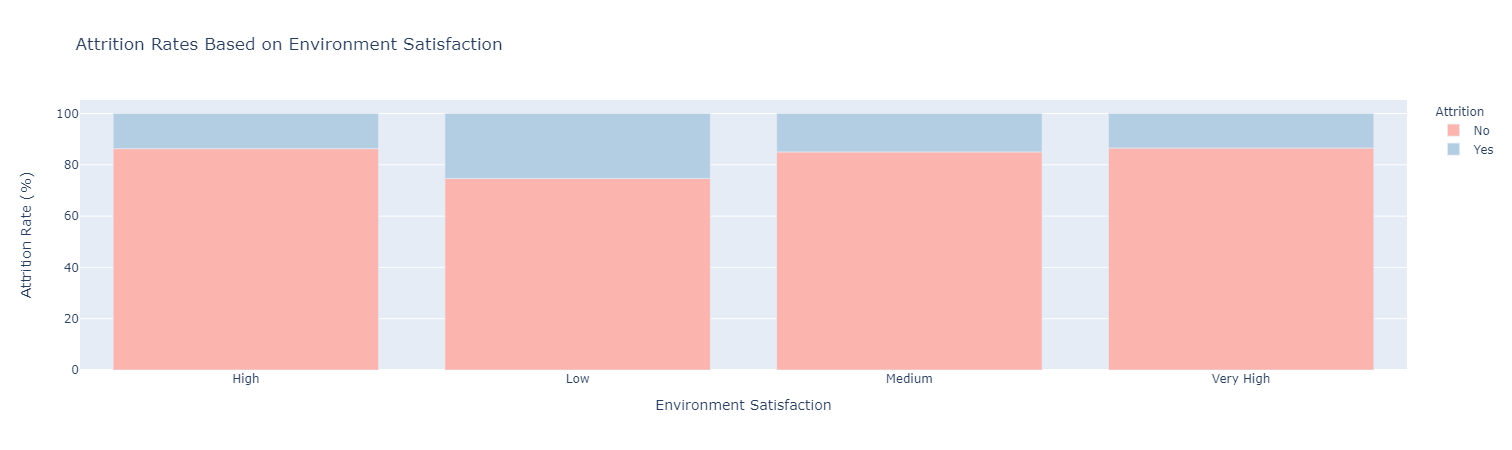

In [48]:
# Group data by EnvironmentSatisfaction and calculate attrition rates
attrition_by_environment = df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_environment['Yes'] = attrition_by_environment['Yes'] * 100
attrition_by_environment['No'] = attrition_by_environment['No'] * 100

# Convert to long format for Plotly
attrition_by_environment_long = pd.melt(attrition_by_environment, id_vars=['EnvironmentSatisfaction'], value_vars=['No', 'Yes'], 
                                         var_name='Attrition', value_name='AttritionRate')
# Create a bar plot using Plotly
fig = px.bar(attrition_by_environment_long, x='EnvironmentSatisfaction', y='AttritionRate', color='Attrition', 
             title='Attrition Rates Based on Environment Satisfaction',
             color_discrete_sequence=px.colors.qualitative.Pastel1)  # Change the color scheme here

# Customize the layout
fig.update_layout(xaxis_title='Environment Satisfaction', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

Similarly, the data indicates a strong relationship between lower levels of environment satisfaction and higher attrition percentages.

### How Does Job Satisfaction Impact Attrition?

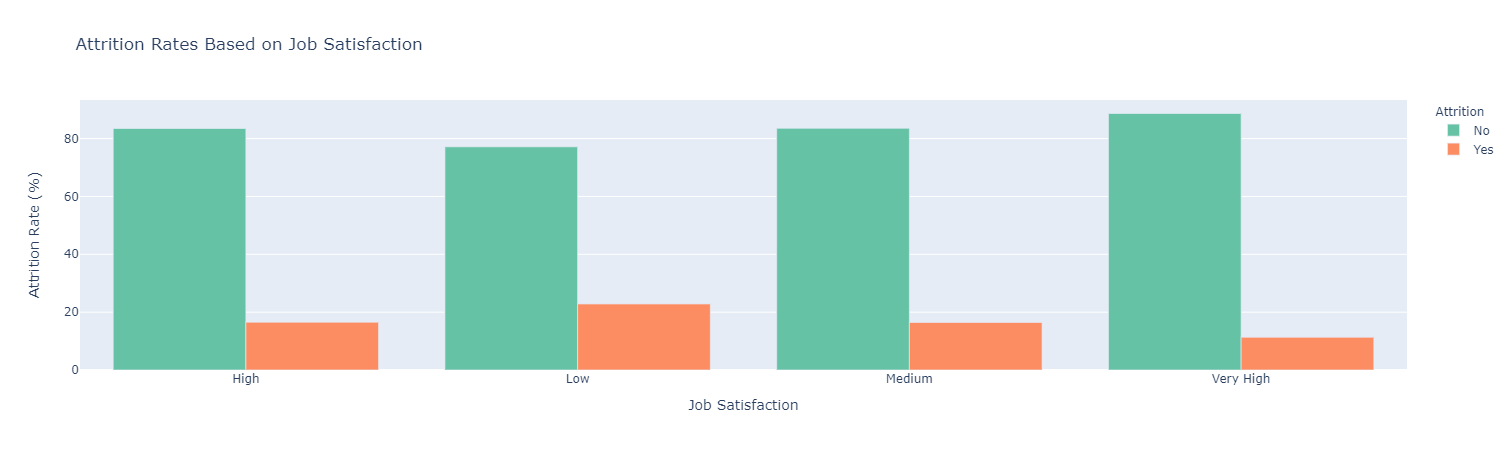

In [49]:

# Group data by JobSatisfaction and calculate attrition rates
attrition_by_jobsatisfaction = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_jobsatisfaction['Yes'] = attrition_by_jobsatisfaction['Yes'] * 100
attrition_by_jobsatisfaction['No'] = attrition_by_jobsatisfaction['No'] * 100

# Convert to long format for Plotly
attrition_by_jobsatisfaction_long = pd.melt(attrition_by_jobsatisfaction, id_vars=['JobSatisfaction'], value_vars=['No', 'Yes'], 
                                            var_name='Attrition', value_name='AttritionRate')

# Create a bar plot using Plotly
fig = px.bar(attrition_by_jobsatisfaction_long, x='JobSatisfaction', y='AttritionRate', color='Attrition', 
             title="Attrition Rates Based on Job Satisfaction", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Set2)  # Set color scheme

# Customize the layout
fig.update_layout(xaxis_title='Job Satisfaction', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

Likewise, a similar pattern emerges when considering job satisfaction, as lower levels of job satisfaction are associated with higher attrition percentages.

### How Does Work-Life Balance Impact Attrition?

In [50]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack().reset_index()

Attrition WorkLifeBalance        No       Yes
0                     Bad  0.687500  0.312500
1                    Best  0.823529  0.176471
2                  Better  0.857783  0.142217
3                    Good  0.831395  0.168605

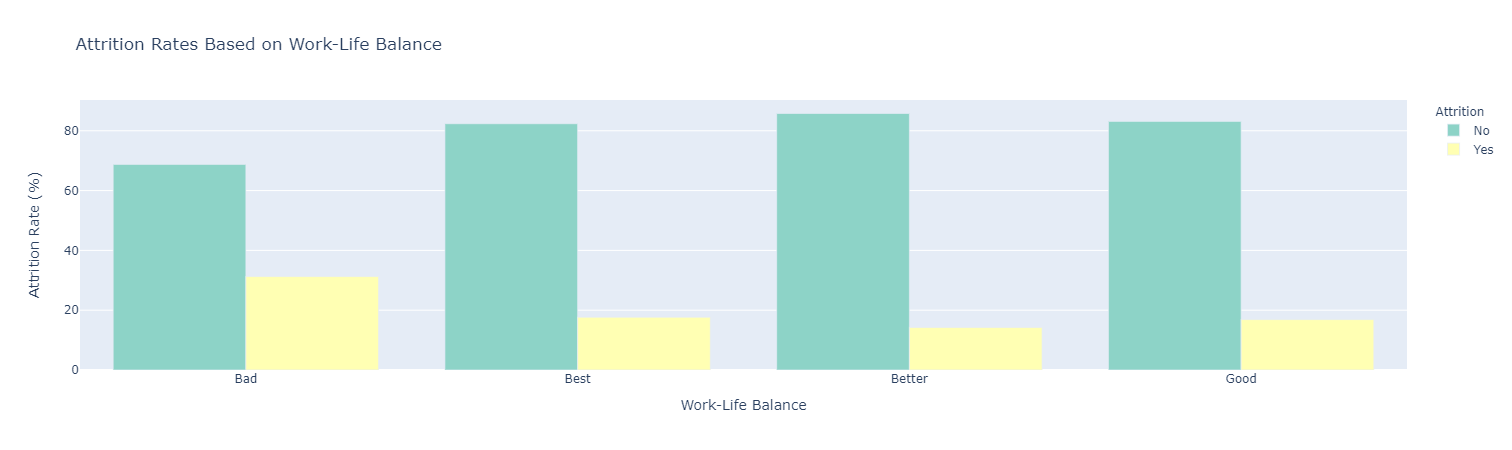

In [51]:
# Group data by WorkLifeBalance and calculate attrition rates
attrition_by_worklife = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_worklife['Yes'] = attrition_by_worklife['Yes'] * 100
attrition_by_worklife['No'] = attrition_by_worklife['No'] * 100

# Convert to long format for Plotly
attrition_by_worklife_long = pd.melt(attrition_by_worklife, id_vars=['WorkLifeBalance'], value_vars=['No', 'Yes'], 
                                     var_name='Attrition', value_name='AttritionRate')

# Create a bar plot using Plotly
fig = px.bar(attrition_by_worklife_long, x='WorkLifeBalance', y='AttritionRate', color='Attrition', 
             title='Attrition Rates Based on Work-Life Balance', barmode='group',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Set color scheme

# Customize the layout
fig.update_layout(xaxis_title='Work-Life Balance', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

The attrition rates based on different levels of WorkLifeBalance reveal valuable insights. Employees with a "Bad" or "Better" work-life balance tend to have higher attrition rates, emphasizing the significance of a healthy work-life balance in retaining staff. Notably, those with a "Best" work-life balance show the lowest attrition rate (17.6%), while the rate is highest for those with a "Bad" balance (31.3%). Even with a "Good" balance, attrition is relatively lower, suggesting room for improvement. This highlights that work-life balance alone may not guarantee retention, as factors like job satisfaction also play a role. Organizations should prioritize enhancing work-life balance through flexible arrangements and supportive environments to mitigate attrition effectively.

### How does satisfaction and work-life balance relate to employee retention?

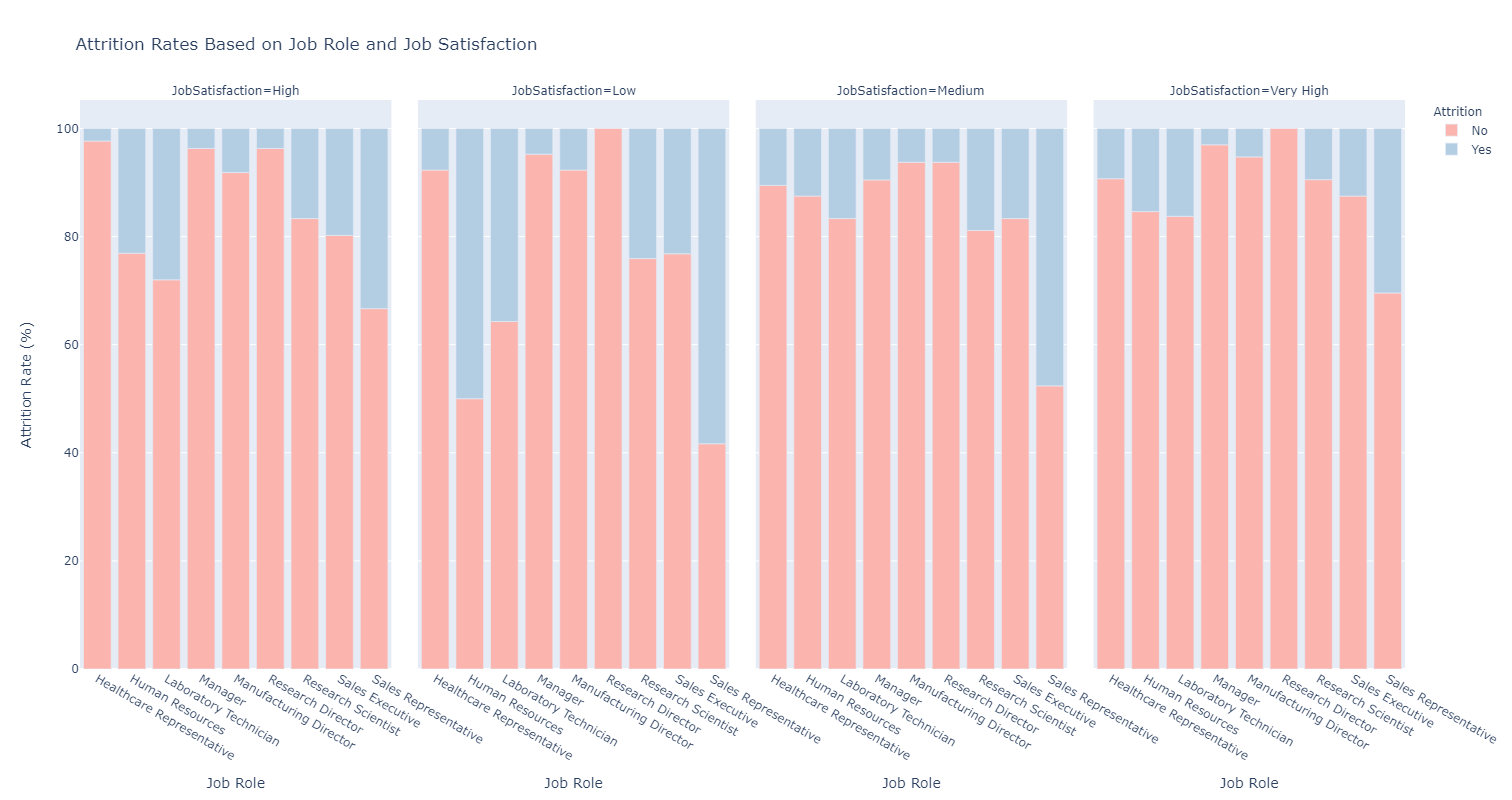

In [52]:
# Group data by JobRole, JobSatisfaction, and calculate attrition rates
attrition_by_role_satisfaction = df.groupby(['JobRole', 'JobSatisfaction'])['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_role_satisfaction['Yes'] = attrition_by_role_satisfaction['Yes'] * 100
attrition_by_role_satisfaction['No'] = attrition_by_role_satisfaction['No'] * 100

# Convert to long format for Plotly
attrition_by_role_satisfaction_long = pd.melt(attrition_by_role_satisfaction, id_vars=['JobRole', 'JobSatisfaction'], value_vars=['No', 'Yes'], 
                                               var_name='Attrition', value_name='AttritionRate')

# Round AttritionRate to 2 decimal places
attrition_by_role_satisfaction_long['AttritionRate'] = attrition_by_role_satisfaction_long['AttritionRate'].round(2)

# Define the desired color sequence
color_discrete_sequence = px.colors.qualitative.Pastel1  # Change this to your desired color sequence

# Create a bar plot using Plotly
fig = px.bar(attrition_by_role_satisfaction_long, x='JobRole', y='AttritionRate', color='Attrition', 
             facet_col='JobSatisfaction',
             labels={'JobRole': 'Job Role', 'AttritionRate': 'Attrition Rate (%)'},
             title='Attrition Rates Based on Job Role and Job Satisfaction',
             height=800,
             color_discrete_sequence=color_discrete_sequence)  # Apply the color sequence

# Customize the layout
fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(matches='y')

# Show the Plotly figure
fig.show()

### Is Work Environment a Factor?

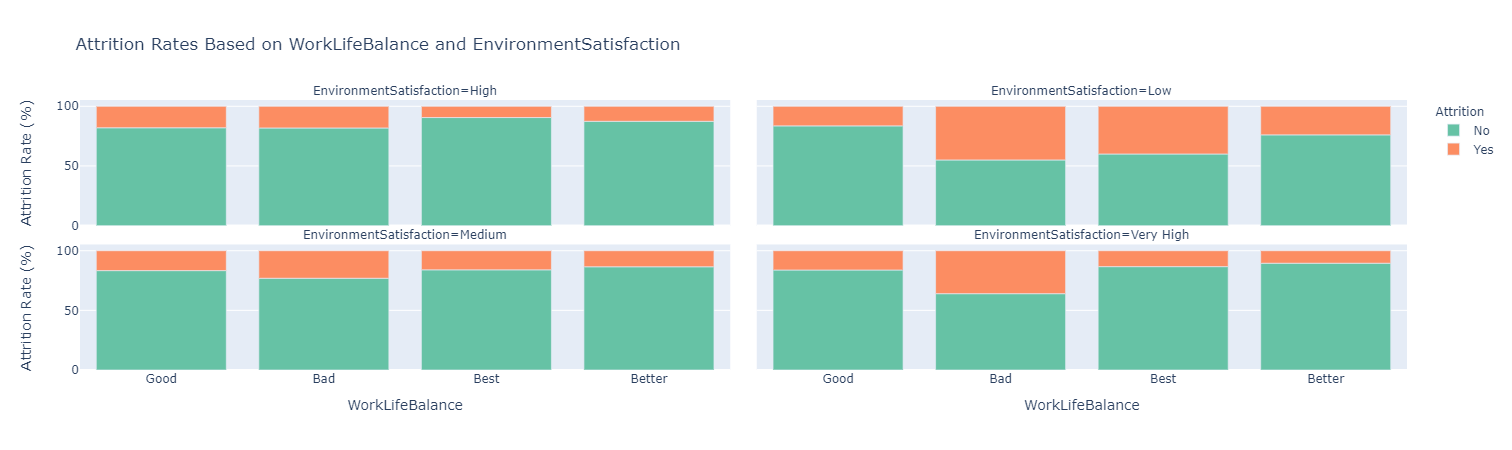

In [53]:
# Group data by different variables and calculate average attrition rates
group_vars = ['WorkLifeBalance', 'EnvironmentSatisfaction']
attrition_by_group = df.groupby(group_vars)['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_group['Yes'] = attrition_by_group['Yes'] * 100
attrition_by_group['No'] = attrition_by_group['No'] * 100

# Convert to long format for Plotly
attrition_by_group_long = pd.melt(attrition_by_group, id_vars=group_vars, value_vars=['No', 'Yes'], 
                                   var_name='Attrition', value_name='AttritionRate')

# Define the desired color sequence
color_discrete_sequence = px.colors.qualitative.Set2  # Change this to your desired color sequence

# Create a bar plot using Plotly
fig = px.bar(attrition_by_group_long, x=group_vars[0], y='AttritionRate', color='Attrition', 
             facet_col=group_vars[1], facet_col_wrap=2,
             labels={group_vars[0]: group_vars[0], 'AttritionRate': 'Attrition Rate (%)'},
             title=f'Attrition Rates Based on {group_vars[0]} and {group_vars[1]}',
             color_discrete_sequence=color_discrete_sequence)

# Customize the layout
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title=group_vars[0], yaxis_title='Attrition Rate (%)')
fig.update_yaxes(matches='y')

# Show the Plotly figure
fig.show()

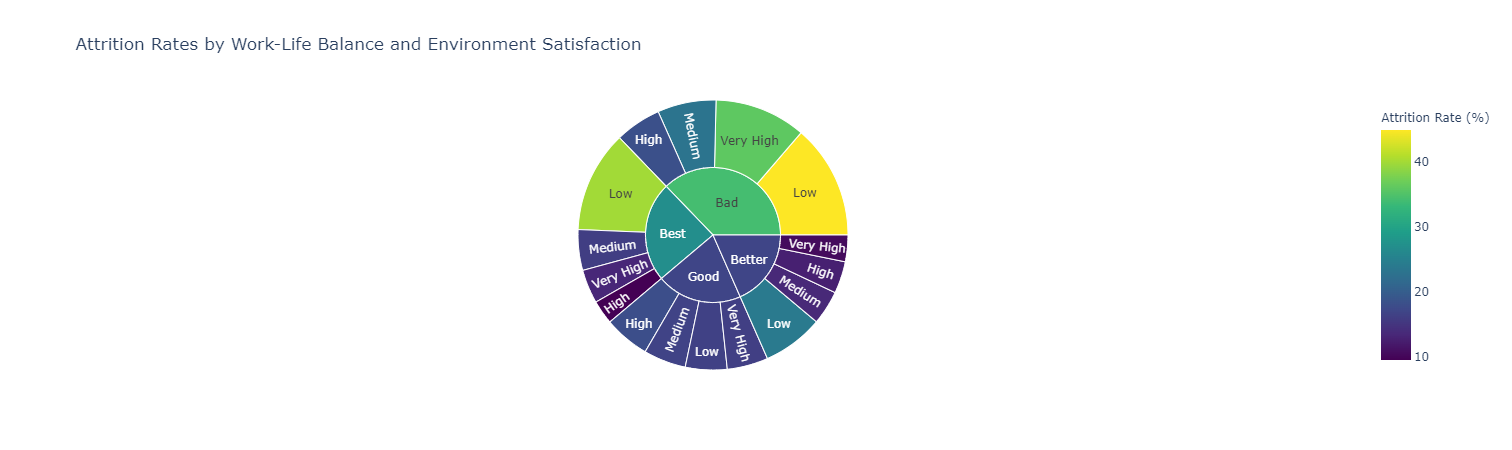

In [54]:
# Group data by WorkLifeBalance, EnvironmentSatisfaction, and Attrition, and calculate attrition rates
attrition_by_worklife_environment = df.groupby(['WorkLifeBalance', 'EnvironmentSatisfaction', 'Attrition']).size().unstack()
attrition_by_worklife_environment['Attrition Rate'] = attrition_by_worklife_environment['Yes'] / (attrition_by_worklife_environment['Yes'] + attrition_by_worklife_environment['No']) * 100

# Reset index for plotting
attrition_by_worklife_environment = attrition_by_worklife_environment.reset_index()

# Create a sunburst chart to examine attrition rates for different levels of work-life balance and environment satisfaction
fig = px.sunburst(attrition_by_worklife_environment, 
                  path=['WorkLifeBalance', 'EnvironmentSatisfaction'],
                  values='Attrition Rate', 
                  title='Attrition Rates by Work-Life Balance and Environment Satisfaction',
                  color='Attrition Rate', 
                  color_continuous_scale='Viridis',
                  labels={'WorkLifeBalance': 'Work-Life Balance', 'Attrition Rate': 'Attrition Rate (%)'},
                  custom_data=['Attrition Rate'])

# Show the plot
fig.show()

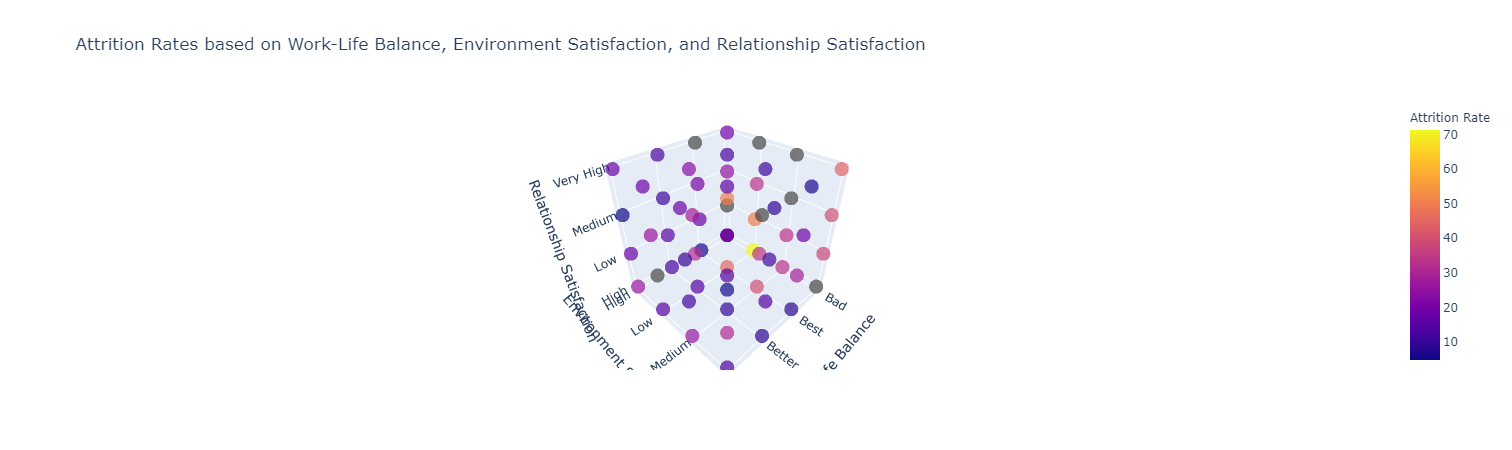

In [55]:
# Group data by WorkLifeBalance, EnvironmentSatisfaction, RelationshipSatisfaction, and Attrition, and calculate attrition rates
attrition_by_work_env_rel = df.groupby(['WorkLifeBalance', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Attrition']).size().unstack()
attrition_by_work_env_rel['Attrition Rate'] = attrition_by_work_env_rel['Yes'] / (attrition_by_work_env_rel['Yes'] + attrition_by_work_env_rel['No']) * 100

# Reset index for plotting
attrition_by_work_env_rel = attrition_by_work_env_rel.reset_index()

# Format attrition rate to two decimal places
attrition_by_work_env_rel['Attrition Rate'] = attrition_by_work_env_rel['Attrition Rate'].apply(lambda x: round(x, 2))

# Create a scatter plot to visualize attrition rates based on three variables
fig = px.scatter_3d(attrition_by_work_env_rel, x='WorkLifeBalance', y='EnvironmentSatisfaction', z='RelationshipSatisfaction',
                    title='Attrition Rates based on Work-Life Balance, Environment Satisfaction, and Relationship Satisfaction',
                    labels={'WorkLifeBalance': 'Work-Life Balance', 'EnvironmentSatisfaction': 'Environment Satisfaction', 'RelationshipSatisfaction': 'Relationship Satisfaction'},
                    color='Attrition Rate', opacity=0.7,
                    hover_data={'Attrition Rate': ':.2f%'})

# Show the plot
fig.show()


### How Does Work Experience Affect Attrition?


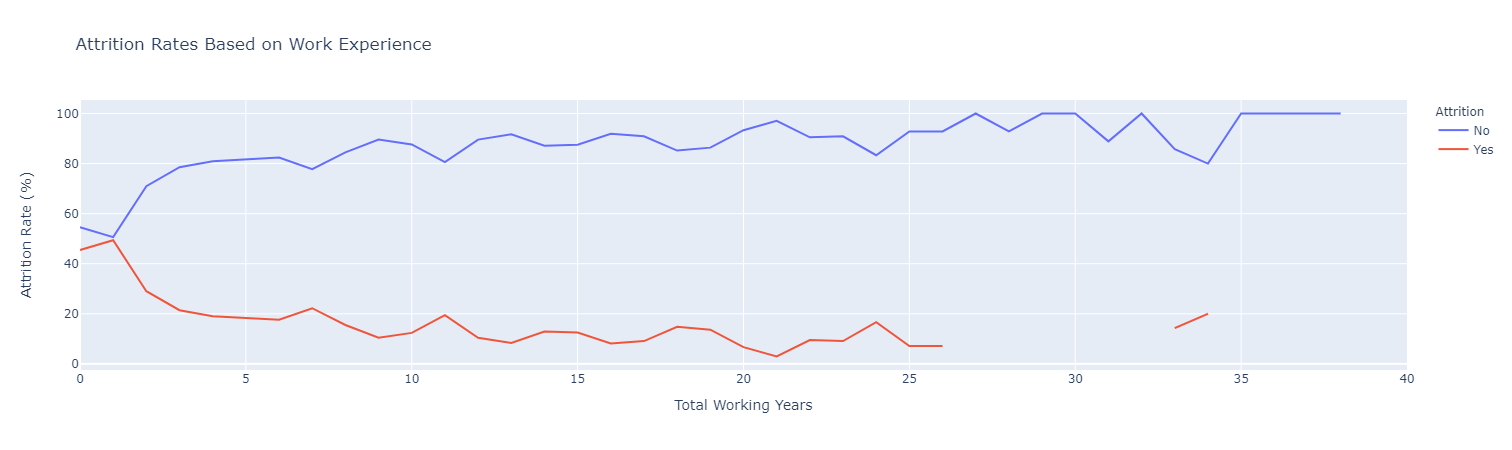

In [56]:
# Group data by TotalWorkingYears and calculate attrition rates
attrition_by_experience = df.groupby('TotalWorkingYears')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_experience['Yes'] = attrition_by_experience['Yes'] * 100
attrition_by_experience['No'] = attrition_by_experience['No'] * 100

# Convert to long format for Plotly
attrition_by_experience_long = pd.melt(attrition_by_experience, id_vars=['TotalWorkingYears'], value_vars=['No', 'Yes'], 
                                        var_name='Attrition', value_name='AttritionRate')

# Create a line plot using Plotly
fig = px.line(attrition_by_experience_long, x='TotalWorkingYears', y='AttritionRate', color='Attrition', 
              title='Attrition Rates Based on Work Experience')

# Customize the layout
fig.update_layout(xaxis_title='Total Working Years', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

As the company's years of operation increase, the proportion of employees leaving the company tends to decrease.

### Do Company Stocks for Employees Impact Attrition?

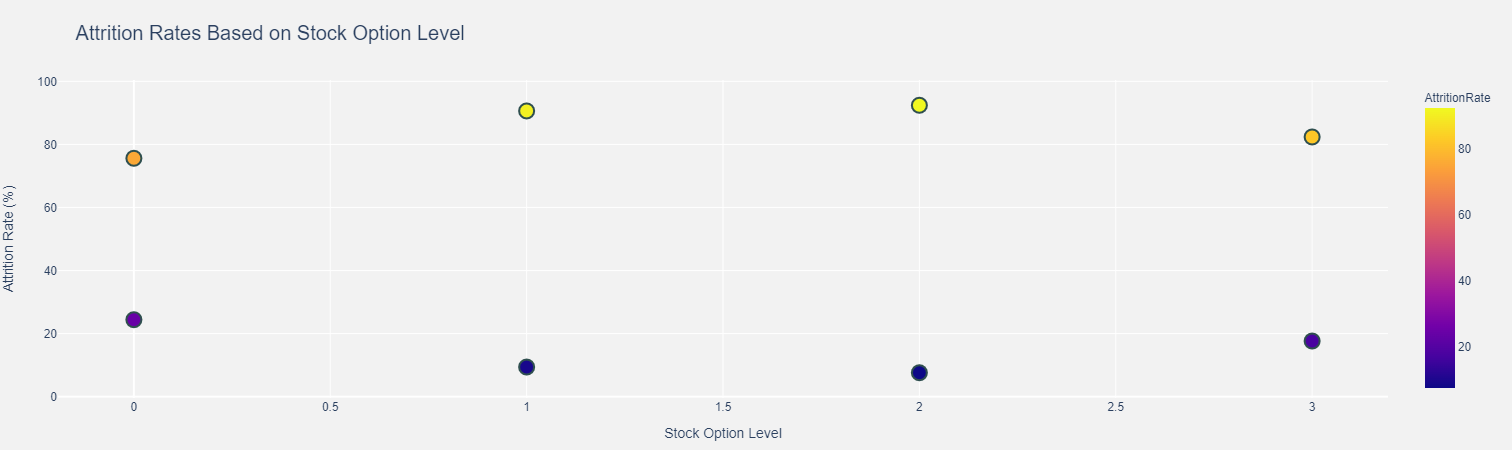

In [57]:
# Group data by StockOptionLevel and calculate attrition rates as percentages
attrition_by_stock = df.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_stock['Yes'] = attrition_by_stock['Yes'] * 100
attrition_by_stock['No'] = attrition_by_stock['No'] * 100

# Convert to long format for Plotly
attrition_by_stock_long = pd.melt(attrition_by_stock, id_vars=['StockOptionLevel'], value_vars=['No', 'Yes'], 
                                  var_name='Attrition', value_name='AttritionRate')
# Create a scatter plot using Plotly
fig = px.scatter(attrition_by_stock_long, x='StockOptionLevel', y='AttritionRate', color='AttritionRate', 
                 title='Attrition Rates Based on Stock Option Level')

# Customize the layout
fig.update_layout(
    xaxis_title='Stock Option Level',
    yaxis_title='Attrition Rate (%)',
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    paper_bgcolor='rgba(0,0,0,0.05)',  # Set paper background color to light gray
    margin=dict(t=80, r=30, l=30, b=30),  # Adjust margins for better layout
)

# Update marker settings for larger points
fig.update_traces(
    marker=dict(size=15, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

# Show the Plotly figure
fig.show()

The data reveals a notable pattern where the highest stock option level corresponds to an increase in attrition. As stock option levels progress from 0 to 3, attrition rates generally decrease, indicating that employees with better stock option offerings are more likely to stay. However, intriguingly, at the final level (level 3), there is a slight uptick in attrition compared to the previous level. This suggests a nuanced relationship between stock options and attrition. 

### How Does Work Duration in Current Role Impact Attrition?


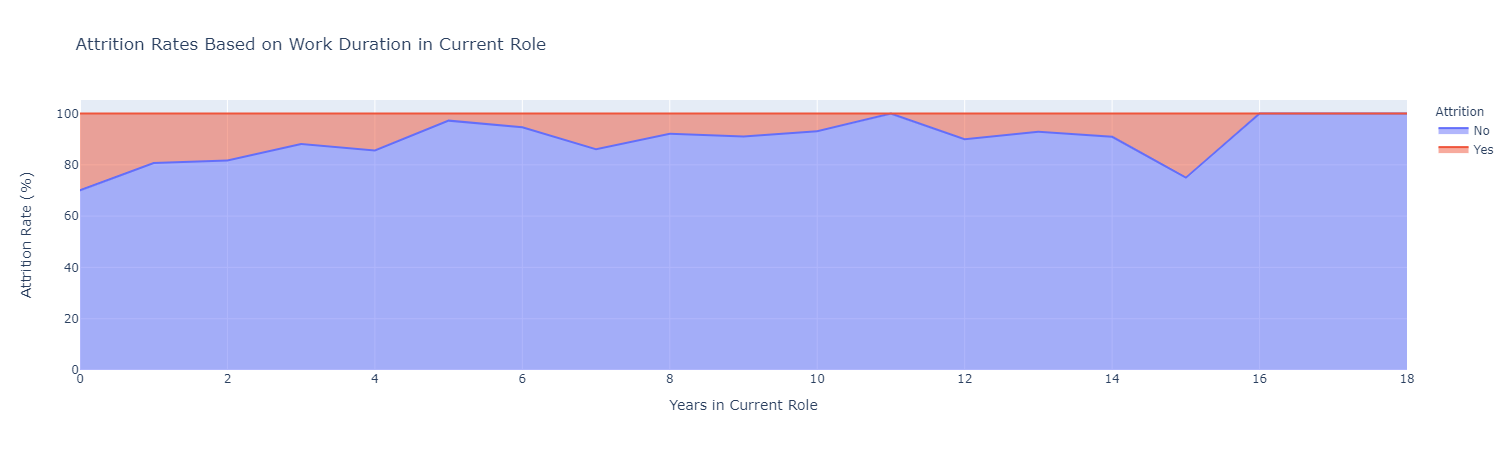

In [58]:
# Group data by YearsInCurrentRole and calculate attrition rates
attrition_by_duration = df.groupby('YearsInCurrentRole')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_duration['Yes'] = attrition_by_duration['Yes'] * 100
attrition_by_duration['No'] = attrition_by_duration['No'] * 100

# Convert to long format for Plotly
attrition_by_duration_long = pd.melt(attrition_by_duration, id_vars=['YearsInCurrentRole'], value_vars=['No', 'Yes'], 
                                      var_name='Attrition', value_name='AttritionRate')

# Create an area plot using Plotly
fig = px.area(attrition_by_duration_long, x='YearsInCurrentRole', y='AttritionRate', color='Attrition', 
              title='Attrition Rates Based on Work Duration in Current Role')

# Customize the layout
fig.update_layout(xaxis_title='Years in Current Role', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

Attrition tends to be higher in the initial years of employment, gradually declining as years in the role increase. Longer tenures correlate with lower attrition rates, suggesting a link between job stability and employee retention.  

### Does hike percentage impact Attrition?

In [59]:
calculate_percentage_cross_tab(df, 'PercentSalaryHike')

Attrition             No    Yes
PercentSalaryHike              
11                 80.48  19.52
12                 83.33  16.67
13                 83.73  16.27
14                 88.06  11.94
15                 82.18  17.82
16                 82.05  17.95
17                 82.93  17.07
18                 85.39  14.61
19                 88.16  11.84
20                 87.27  12.73
21                 89.58  10.42
22                 78.57  21.43
23                 78.57  21.43
24                 71.43  28.57
25                 94.44   5.56

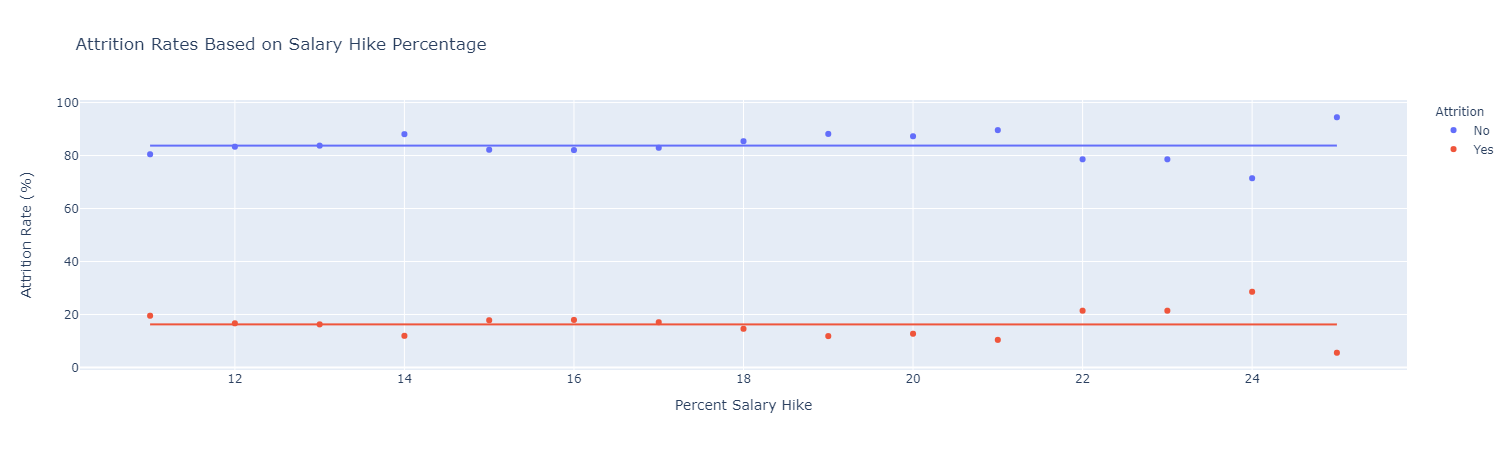

In [60]:
# Group data by PercentSalaryHike and calculate attrition rates
attrition_by_hike = df.groupby('PercentSalaryHike')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_hike['Yes'] = attrition_by_hike['Yes'] * 100
attrition_by_hike['No'] = attrition_by_hike['No'] * 100

# Convert to long format for Plotly
attrition_by_hike_long = pd.melt(attrition_by_hike, id_vars=['PercentSalaryHike'], value_vars=['No', 'Yes'], 
                                  var_name='Attrition', value_name='AttritionRate')

# Create a scatter plot using Plotly
fig = px.scatter(attrition_by_hike_long, x='PercentSalaryHike', y='AttritionRate', color='Attrition', 
                 title='Attrition Rates Based on Salary Hike Percentage', trendline='ols')

# Customize the layout
fig.update_layout(xaxis_title='Percent Salary Hike', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

The data illustrates how attrition rates vary across different levels of "Percent Salary Hike." While certain levels exhibit lower attrition rates, others show higher rates. Notably, there are instances where minor differences in salary hike percentage lead to significant differences in attrition. Optimal attrition rates are observed for employees receiving around 18% to 21% salary increase. Interestingly, a 25% hike corresponds to remarkably low attrition. Overall, the data underscores the non-linear connection between salary increase and attrition, emphasizing the need for balanced compensation strategies.


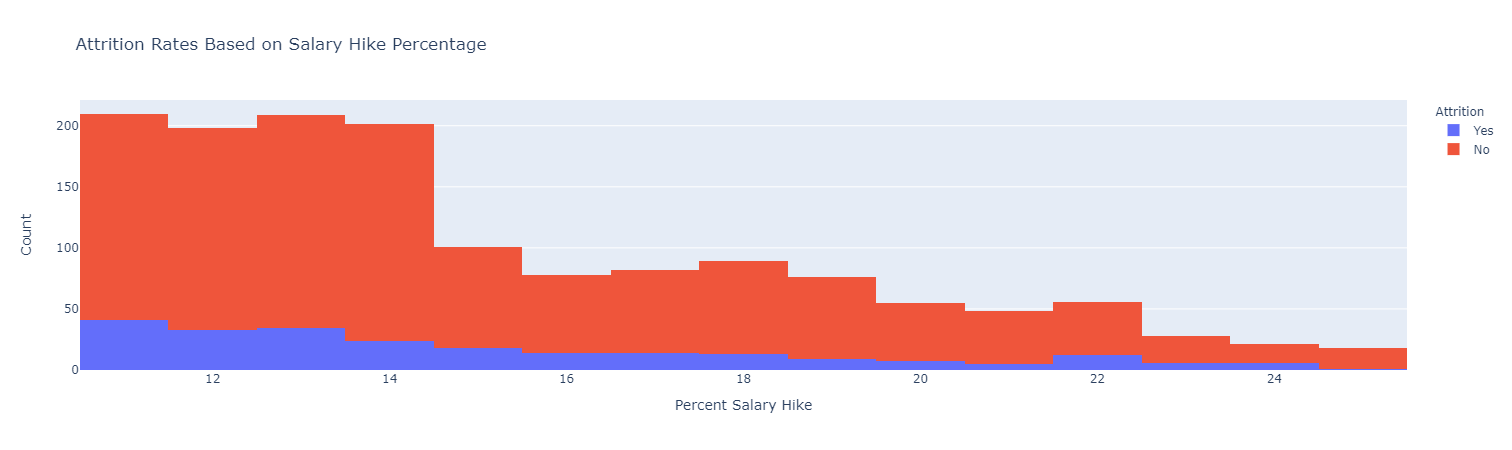

In [61]:
# Create a stacked histogram using Plotly
fig = px.histogram(data_frame=df, x="PercentSalaryHike", color="Attrition", 
                   title="Attrition Rates Based on Salary Hike Percentage",
                   nbins=20, barmode='stack')

# Customize the layout
fig.update_layout(xaxis_title='Percent Salary Hike', yaxis_title='Count', legend_title='Attrition')

# Show the Plotly figure
fig.show()

Lower salary hike percentages, particularly at 11%, 12%, and 13%, correspond to higher attrition rates, possibly indicating dissatisfaction when increments are minimal. However, moderate salary hikes between 14% and 18% are associated with reduced attrition, suggesting that reasonable raises contribute to retention. Surprisingly, very high salary hikes, like 24% and 25%, also lead to increased attrition, possibly due to external opportunities. Optimal retention seems tied to a balanced salary hike range. 

###  Does Relationship Satisfaction Impact Attrition Rates?

In [62]:
calculate_percentage_cross_tab(df, 'RelationshipSatisfaction')

Attrition                    No    Yes
RelationshipSatisfaction              
High                      84.53  15.47
Low                       79.35  20.65
Medium                    85.15  14.85
Very High                 85.19  14.81

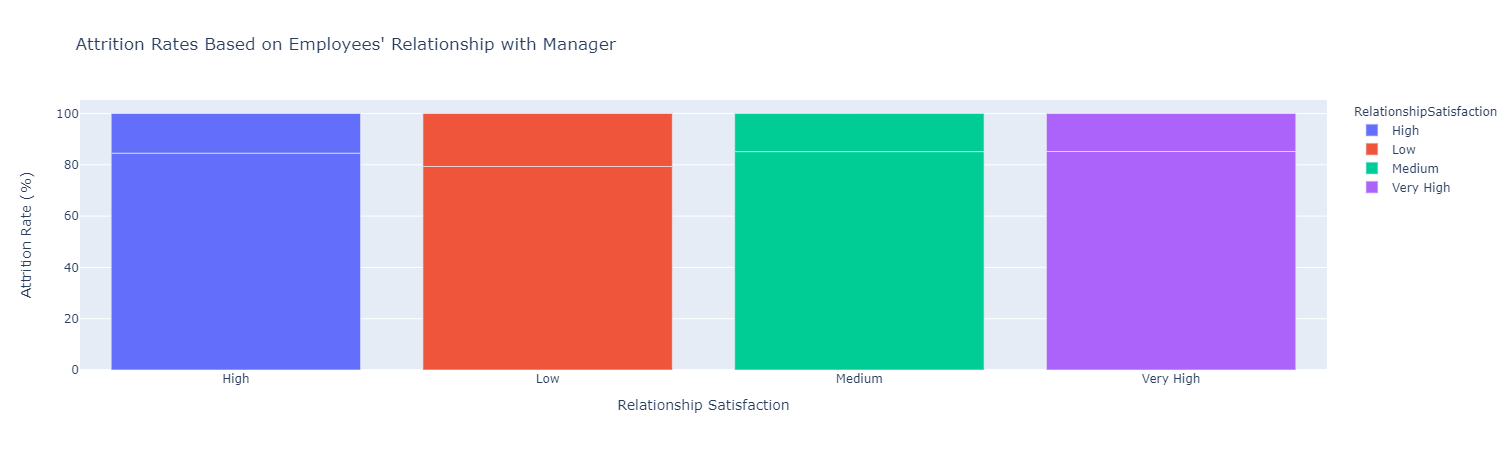

In [63]:
# Group data by RelationshipSatisfaction and calculate attrition rates
attrition_by_manager = df.groupby('RelationshipSatisfaction')['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_manager['Yes'] = attrition_by_manager['Yes'] * 100
attrition_by_manager['No'] = attrition_by_manager['No'] * 100

# Convert to long format for Plotly
attrition_by_manager_long = pd.melt(attrition_by_manager, id_vars=['RelationshipSatisfaction'], value_vars=['No', 'Yes'], 
                                     var_name='Attrition', value_name='AttritionRate')

# Create a bar plot using Plotly
fig = px.bar(attrition_by_manager_long, x='RelationshipSatisfaction', y='AttritionRate', color='RelationshipSatisfaction', 
             title="Attrition Rates Based on Employees' Relationship with Manager")

# Customize the layout
fig.update_layout(xaxis_title='Relationship Satisfaction', yaxis_title='Attrition Rate (%)')

# Show the Plotly figure
fig.show()

The data shows that employees with high relationship satisfaction tend to have a lower attrition rate (15.5%), while those with low relationship satisfaction have a higher attrition rate (20.7%). Interestingly, even though employees with very high relationship satisfaction have a slightly lower attrition rate (14.8%) than those with high satisfaction, extremely high satisfaction levels don't appear to significantly affect attrition. This highlights the importance of maintaining positive workplace relationships to reduce attrition, but also suggests that excessively high satisfaction alone may not prevent attrition.

### What sources are best for high performing employees?

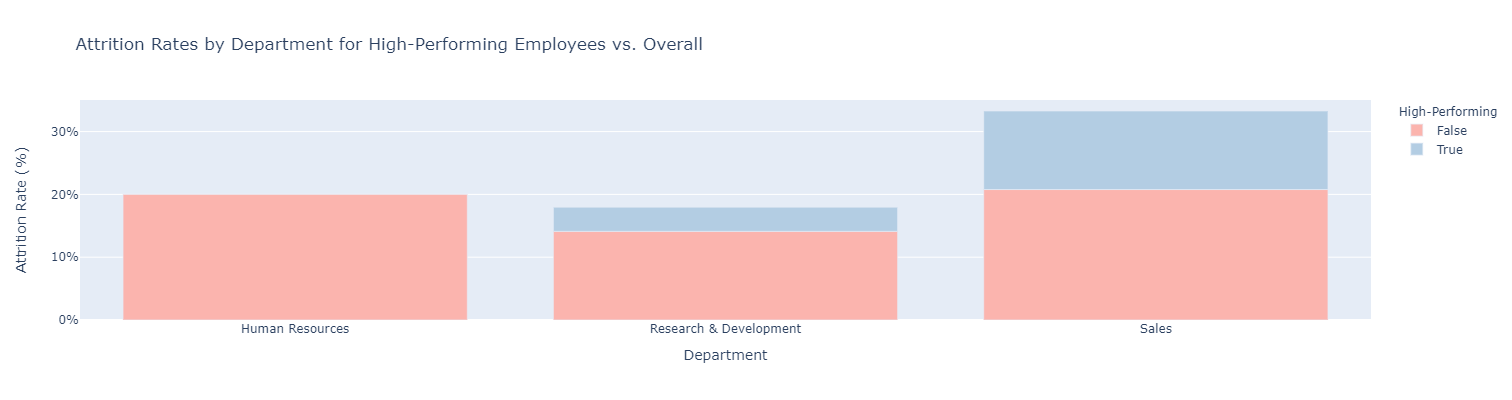

In [64]:
# Define high-performing criteria
high_performing_criteria = (df['JobLevel'] >= 4) & (df['JobSatisfaction'] == 'Very High') & (df['YearsInCurrentRole'] >= 3)

# Create a new column to indicate high-performing
df['HighPerforming'] = high_performing_criteria

# Calculate attrition rates by department for high-performing and overall employees
attrition_by_department = df.groupby(['Department', 'HighPerforming'])['Attrition'].value_counts(normalize=True).unstack()

# Plot attrition rates by department for high-performing and overall employees
fig = px.bar(attrition_by_department.reset_index(), 
             x='Department', y='Yes', 
             color='HighPerforming',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             labels={'Yes': 'Attrition Rate'},
             height=400, width=800,
             title="Attrition Rates by Department for High-Performing Employees vs. Overall"
            )

fig.update_layout(
    xaxis_title="Department",
    yaxis_title="Attrition Rate (%)",
    xaxis=dict(type='category'),
    yaxis=dict(tickformat=".0%"),
    showlegend=True,
    legend_title="High-Performing"
)
fig.show()


The data highlights significant patterns in attrition rates across departments and performance categories. In the Human Resources department, "HighPerforming" employees exhibit notably lower attrition (20%) compared to their counterparts. In Research & Development and Sales, the "HighPerforming" category experiences lower attrition (14.12% and 12.5% respectively). These findings underline the positive correlation between high performance and reduced attrition. Additionally, the Research & Development department showcases consistent attrition rates regardless of performance, while the Sales department demonstrates the effectiveness of high performance in retaining employees. This data underscores the importance of recognizing and nurturing high-performing employees to mitigate attrition risks and improve overall employee retention strategies.

### People who live more than 25 minutes away from work tend to be less happy than those who don't. Lets see whether this is the case.


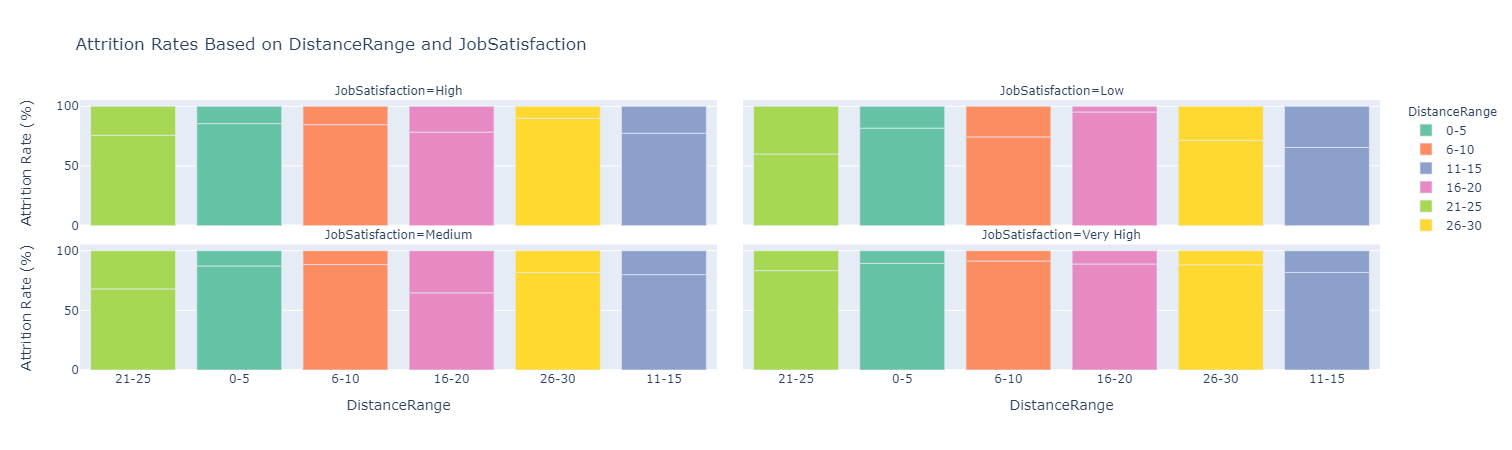

In [65]:
# Group data by different variables and calculate average attrition rates
group_vars = ['DistanceRange', 'JobSatisfaction']
attrition_by_group = df.groupby(group_vars)['Attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_by_group['Yes'] = attrition_by_group['Yes'] * 100
attrition_by_group['No'] = attrition_by_group['No'] * 100

# Convert to long format for Plotly
attrition_by_group_long = pd.melt(attrition_by_group, id_vars=group_vars, value_vars=['No', 'Yes'], 
                                   var_name='Attrition', value_name='AttritionRate')

# Define the desired color sequence
color_discrete_sequence = px.colors.qualitative.Set2  # Change this to your desired color sequence

# Create a bar plot using Plotly
fig = px.bar(attrition_by_group_long, x=group_vars[0], y='AttritionRate', color=group_vars[0], 
             facet_col=group_vars[1], facet_col_wrap=2,
             labels={group_vars[0]: group_vars[0], 'AttritionRate': 'Attrition Rate (%)'},
             title=f'Attrition Rates Based on {group_vars[0]} and {group_vars[1]}',
             color_discrete_sequence=color_discrete_sequence)

# Customize the layout
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title=group_vars[0], yaxis_title='Attrition Rate (%)')
fig.update_yaxes(matches='y')

# Show the Plotly figure
fig.show()

Employees residing within 25 minutes from their workplace demonstrate lower attrition rates, particularly when they report high job satisfaction levels. Notably, job satisfaction consistently shows a strong negative correlation with attrition across all distance ranges

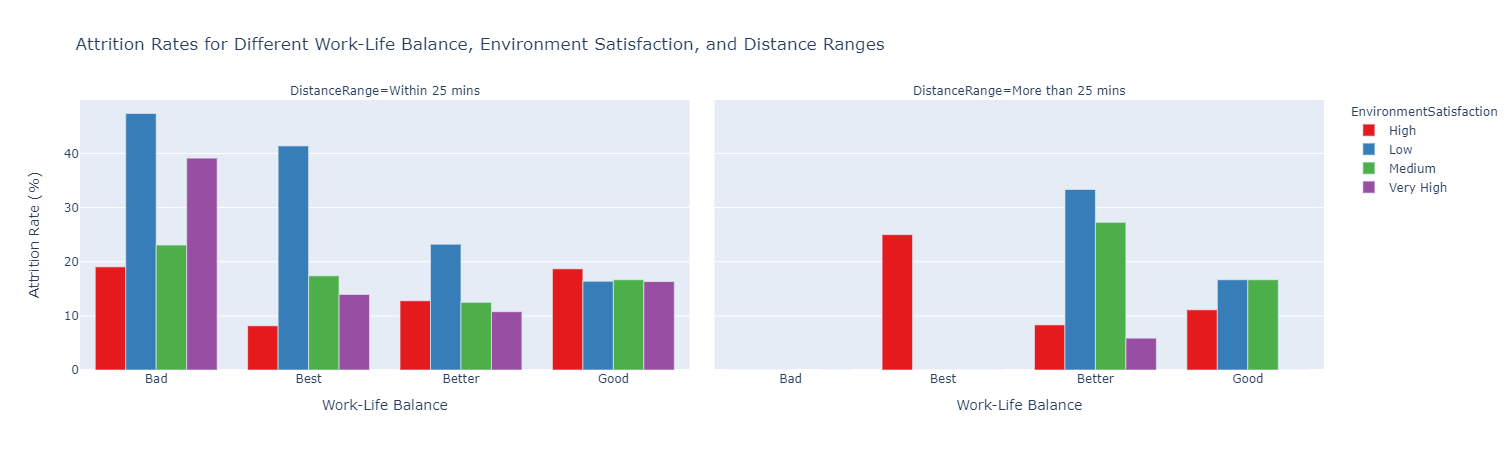

In [66]:
# Group data by WorkLifeBalance, EnvironmentSatisfaction, and Attrition, and calculate attrition rates
attrition_by_work_env = df.groupby(['WorkLifeBalance', 'EnvironmentSatisfaction', 'Attrition']).size().unstack()
attrition_by_work_env['Attrition Rate'] = attrition_by_work_env['Yes'] / (attrition_by_work_env['Yes'] + attrition_by_work_env['No']) * 100

# Reset index for plotting
attrition_by_work_env = attrition_by_work_env.reset_index()

# Create distance ranges
df['DistanceRange'] = pd.cut(df['DistanceFromHome'], bins=[-1, 25, df['DistanceFromHome'].max()], labels=['Within 25 mins', 'More than 25 mins'])

# Group data by WorkLifeBalance, EnvironmentSatisfaction, DistanceRange, and Attrition, and calculate attrition rates
attrition_by_work_env_distance = df.groupby(['WorkLifeBalance', 'EnvironmentSatisfaction', 'DistanceRange', 'Attrition']).size().unstack()
attrition_by_work_env_distance['Attrition Rate'] = attrition_by_work_env_distance['Yes'] / (attrition_by_work_env_distance['Yes'] + attrition_by_work_env_distance['No']) * 100

# Reset index for plotting
attrition_by_work_env_distance = attrition_by_work_env_distance.reset_index()

# Create a grouped bar plot to examine attrition rates for different work-life balance, environment satisfaction, and distance ranges
fig = px.bar(attrition_by_work_env_distance, x='WorkLifeBalance', y='Attrition Rate',
             title='Attrition Rates for Different Work-Life Balance, Environment Satisfaction, and Distance Ranges',
             labels={'WorkLifeBalance': 'Work-Life Balance', 'Attrition Rate': 'Attrition Rate (%)'},
             color='EnvironmentSatisfaction', barmode='group', facet_col='DistanceRange',
             color_discrete_sequence=px.colors.qualitative.Set1)


# Show the plot
fig.show()

Employees with lower work-life balance and environment satisfaction ratings tend to exhibit higher attrition rates, with a noticeable decrease in attrition for those rating their job involvement as "Best." Generally, employees reporting high job satisfaction have lower attrition rates, while medium or low job satisfaction often corresponds to higher attrition, particularly in conjunction with lower work-life balance or environment satisfaction. By emphasizing positive work-life balance, environment satisfaction, and job satisfaction, companies can potentially reduce attrition rates and foster a more engaged and satisfied workforce.

### What sources are best for high performing employees?

In [67]:
# Filter data for high performing employees 
high_performers = df[df['PerformanceRating'] == 'Excellent']

# Group data by BusinessTravel and Department and calculate the count of high performers
source_counts = high_performers.groupby(['BusinessTravel', 'Department']).size().reset_index(name='Count')
source_counts

BusinessTravel              Department  Count
0         Non-Travel         Human Resources      5
1         Non-Travel  Research & Development     78
2         Non-Travel                   Sales     41
3  Travel_Frequently         Human Resources     10
4  Travel_Frequently  Research & Development    146
5  Travel_Frequently                   Sales     75
6      Travel_Rarely         Human Resources     39
7      Travel_Rarely  Research & Development    581
8      Travel_Rarely                   Sales    269

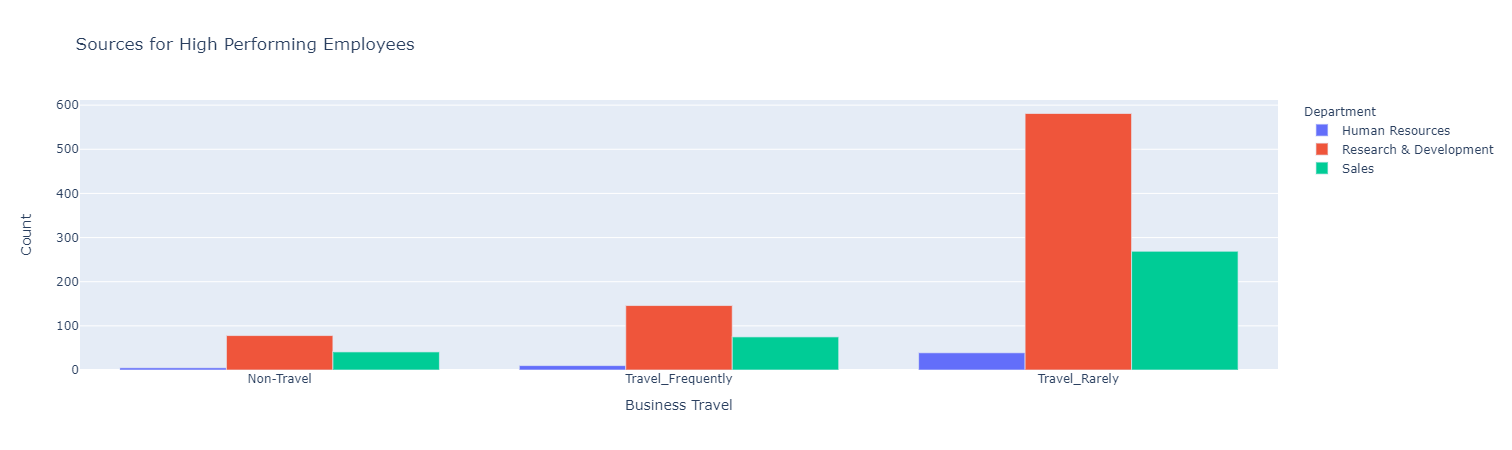

In [68]:
# Filter data for high performing employees 
high_performers = df[df['PerformanceRating'] == 'Excellent']

# Group data by BusinessTravel and Department and calculate the count of high performers
source_counts = high_performers.groupby(['BusinessTravel', 'Department']).size().reset_index(name='Count')

# Create a bar plot using Plotly
fig = px.bar(source_counts, x='BusinessTravel', y='Count', color='Department',
             title='Sources for High Performing Employees', 
             labels={'BusinessTravel': 'Business Travel', 'Count': 'Count'},
             barmode='group')

# Customize the layout
fig.update_layout(xaxis_title='Business Travel', yaxis_title='Count')

# Show the Plotly figure
fig.show()


The analysis of high performing employees based on business travel frequency and department reveals interesting trends. Notably, the Research & Development department consistently stands out with a higher count of high performers across all travel frequencies. In particular, employees who travel frequently or rarely contribute significantly to the high performing pool, especially in the Sales department. On the other hand, the Human Resources department exhibits lower counts of high performers across travel frequencies. These findings suggest that the Research & Development and Sales departments are key contributors to the organization's high performing workforce, with travel frequency playing a role in the distribution of high performers.






### How many new hires leave in less than a year and why?


In [69]:
# Filter data for employees who left within a year
new_hires_leaving = df[(df['Attrition'] == 'Yes') & (df['YearsAtCompany'] < 1)]

# Count the number of employees who left within a year
num_new_hires_leaving = len(new_hires_leaving)

# Print the number of new hires who left within a year
print(f"Number of new hires who left within a year: {num_new_hires_leaving}")

# Display characteristics of these employees
print("Characteristics of new hires who left within a year:")
print(new_hires_leaving[['EmployeeNumber', 'Age', 'Department', 'JobRole', 'MonthlyIncome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']])


Number of new hires who left within a year: 16

Characteristics of new hires who left within a year:

      EmployeeNumber  Age              Department                JobRole  \

2                  4   37  Research & Development  Laboratory Technician   

127              167   19                   Sales   Sales Representative   

171              235   19                   Sales   Sales Representative   

264              364   28  Research & Development  Laboratory Technician   

296              405   18  Research & Development  Laboratory Technician   

457              614   18                   Sales   Sales Representative   

585              811   23  Research & Development  Laboratory Technician   

711              994   29  Research & Development     Research Scientist   

801             1113   50                   Sales        Sales Executive   

828             1156   18  Research & Development  Laboratory Technician   

860             1203   22  Research & Development  

The data provided doesn't explicitly reveal a single mean reason for new hires leaving within a year, as attrition in the first year is likely influenced by a combination of factors. From the analysis, it appears that factors such as job fit, departmental dynamics, work-life balance, and individual expectations play roles in early attrition. Younger employees may be more likely to explore new opportunities or experience job dissatisfaction.



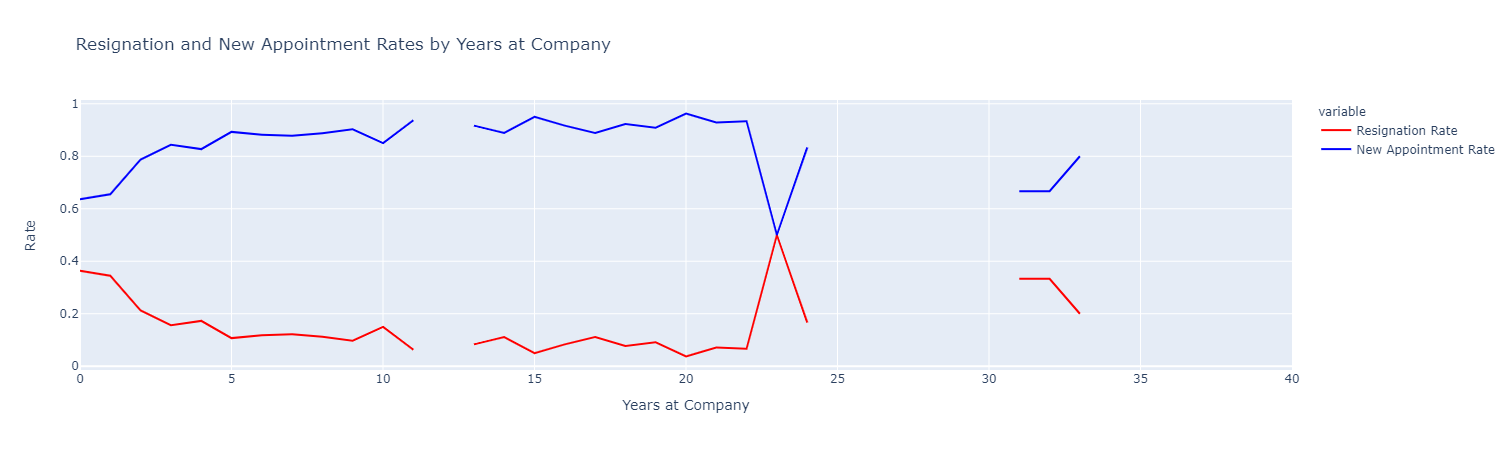

In [70]:
# Group data by YearsAtCompany and Attrition
attrition_by_years = df.groupby(['YearsAtCompany', 'Attrition']).size().unstack()

# Calculate resignation rate and new appointment rate for each year
attrition_by_years['Resignation Rate'] = attrition_by_years['Yes'] / (attrition_by_years['Yes'] + attrition_by_years['No'])
attrition_by_years['New Appointment Rate'] = attrition_by_years['No'] / (attrition_by_years['Yes'] + attrition_by_years['No'])

# Reset index for plotting
attrition_by_years.reset_index(inplace=True)

# Create a line plot using Plotly Express
fig = px.line(attrition_by_years, x='YearsAtCompany', y=['Resignation Rate', 'New Appointment Rate'],
              title='Resignation and New Appointment Rates by Years at Company',
              labels={'YearsAtCompany': 'Years at Company', 'value': 'Rate'},
              color_discrete_map={'Resignation Rate': 'red', 'New Appointment Rate': 'blue'})

# Show the plot
fig.show()


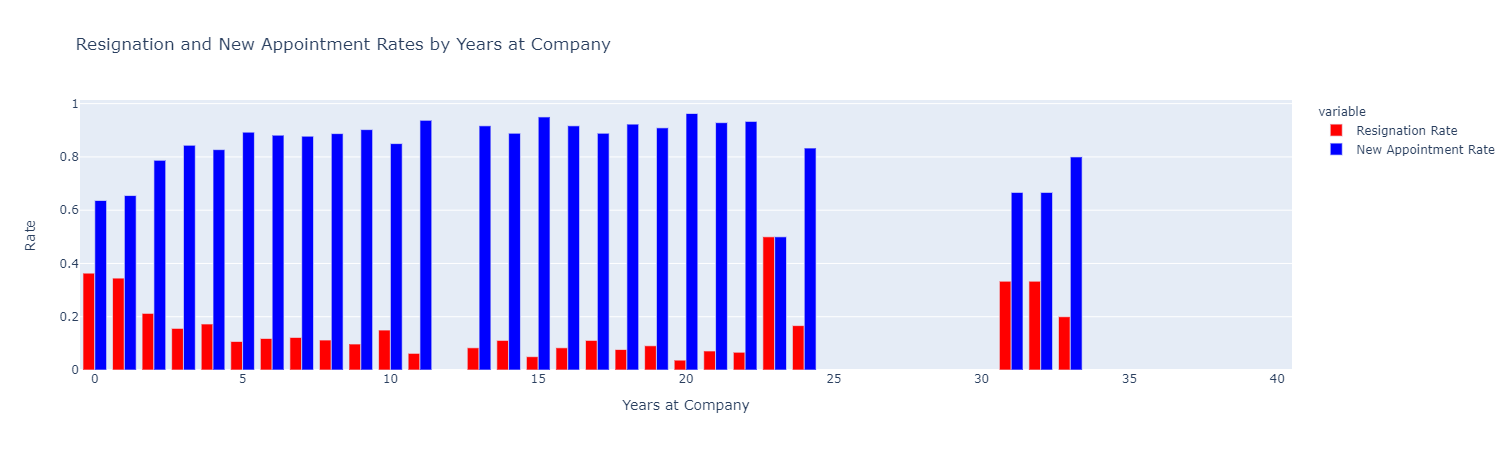

In [71]:
# Group data by YearsAtCompany and Attrition
attrition_by_years = df.groupby(['YearsAtCompany', 'Attrition']).size().unstack()

# Calculate resignation rate and new appointment rate for each year
attrition_by_years['Resignation Rate'] = attrition_by_years['Yes'] / (attrition_by_years['Yes'] + attrition_by_years['No'])
attrition_by_years['New Appointment Rate'] = attrition_by_years['No'] / (attrition_by_years['Yes'] + attrition_by_years['No'])

# Reset index for plotting
attrition_by_years.reset_index(inplace=True)

# Create a bar plot using Plotly Express
fig = px.bar(attrition_by_years, x='YearsAtCompany', y=['Resignation Rate', 'New Appointment Rate'],
             title='Resignation and New Appointment Rates by Years at Company',
             labels={'YearsAtCompany': 'Years at Company', 'value': 'Rate'},
             color_discrete_map={'Resignation Rate': 'red', 'New Appointment Rate': 'blue'},
             barmode='group')

# Show the plot
fig.show()

<h3 style="color:darkred; font-weight:bold;">Step 3: Data Preparation & Modeling </h3>


In [72]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeNumber  \
0                 1        College  Life Sciences               1   
1                 8  Below College  Life Sciences               2   
2                 2        College          Other               4   
3                 3         Master  Life Sciences               5   
4                 2  Below College        Medical               7   

  EnvironmentSatisfaction  Gender  HourlyRate JobInvolvement  JobLevel  \
0                  Medium  Female          94           High         2   
1                    High    Male          61         Medium         2   
2               Very High    Male          92         Medium         1   
3               Very High  Female          56           High         1   
4                     Low    Male          40           High         1   

                 JobRole JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive       Very High        Single           5993   
1     Research Scientist          Medium       Married           5130   
2  Laboratory Technician            High        Single           2090   
3     Research Scientist            High       Married           2909   
4  Laboratory Technician          Medium       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0         Excellent                      Low                 0   
1       Outstanding                Very High                 1   
2         Excellent                   Medium                 0   
3         Excellent                     High                 0   
4         Excellent                Very High                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0             Bad               6   
1                 10                      3          Better              10   
2                  7                      3          Better               0   
3                  8                      3          Better               8   
4                  6                      3          Better               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

  Age Group   DistanceRange Income Quartile  HighPerforming  
0     40-49  Within 25 mins              Q3           False  
1     40-49  Within 25 mins              Q3           False  
2     30-39  Within 25 mins              Q1           False  
3     30-39  Within 25 mins              Q1           False  
4     18-29  Within 25 mins              Q2           False

In [73]:
df1.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [74]:
df1= df1.drop(['EmployeeNumber'], axis=1)

### Imports and Data Preparation

In [75]:
#Transform categorical values to the binary values using the dictionary function
df1['Attrition'] = df1['Attrition'].replace({'No': 0, 'Yes': 1})
print(f"Attribute: {df1['Attrition'].unique(), df1['Attrition'].dtype}")


Attribute: (array([1, 0], dtype=int64), dtype('int64'))


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df1.drop("Attrition", axis=1)
y = df1["Attrition"]

# Encode categorical columns
nominal_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# One-hot encode nominal columns
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = pd.concat([X.drop(nominal_cols, axis=1),
                      pd.DataFrame(encoder.fit_transform(X[nominal_cols]))], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Oversampling using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


### Hyperparameter Tuning for Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)
rf_grid.fit(X_train_resampled, y_train_resampled)
rf_best = rf_grid.best_estimator_


### Hyperparameter Tuning for CatBoost

In [78]:
from catboost import CatBoostClassifier

# Hyperparameter tuning for CatBoost using GridSearchCV
cat_params = {
    "iterations": [100, 200, 300],
    "depth": [6, 8, 10],
    "learning_rate": [0.1, 0.2, 0.3]
}
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), param_grid=cat_params, cv=5)
cat_grid.fit(X_train_resampled, y_train_resampled)
cat_best = cat_grid.best_estimator_


### Training and Evaluating SVM Classifier

In [79]:
from sklearn.svm import SVC

# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_classifier.predict(X_test)


### Training and Evaluating MLP Classifier

In [80]:
from sklearn.neural_network import MLPClassifier

# Train and evaluate MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train_resampled, y_train_resampled)
mlp_predictions = mlp_classifier.predict(X_test)


### Training and Evaluating Logistic Regression Classifier

In [81]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression classifier
lr_classifier = LogisticRegression(class_weight='balanced', random_state=42)
lr_classifier.fit(X_train_resampled, y_train_resampled)
lr_predictions = lr_classifier.predict(X_test)


### Training and Evaluating XGBoost Classifier

In [82]:
from xgboost import XGBClassifier

# Train and evaluate XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_classifier.predict(X_test)


### Print Classification Reports for All Classifiers

In [83]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Print classification reports for all classifiers 
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest (Tuned)": rf_best,
    "CatBoost (Tuned)": cat_best,
    "SVM": svm_classifier,
    "MLP": mlp_classifier,
    "Logistic Regression": lr_classifier,
    "XGBoost": xgb_classifier
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_resampled, y_train_resampled)
    predictions = classifier.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, predictions))
    print("="*50)


Classifier: Decision Tree

              precision    recall  f1-score   support



           0       0.90      0.86      0.88       255

           1       0.29      0.38      0.33        39



    accuracy                           0.80       294

   macro avg       0.60      0.62      0.61       294

weighted avg       0.82      0.80      0.81       294




Classifier: Random Forest (Tuned)

              precision    recall  f1-score   support



           0       0.89      0.98      0.93       255

           1       0.60      0.23      0.33        39



    accuracy                           0.88       294

   macro avg       0.75      0.60      0.63       294

weighted avg       0.85      0.88      0.85       294




Classifier: CatBoost (Tuned)

              precision    recall  f1-score   support



           0       0.91      0.98      0.94       255

           1       0.72      0.33      0.46        39



    accuracy                           0.89       294

   macro a

### Initialize and Train Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier

# Initialize the voting classifier 
voting_classifier = VotingClassifier(estimators=[
    ("Random Forest", rf_best),
    ("CatBoost", cat_best),
    ("MLP", mlp_classifier),
    ("Logistic Regression", lr_classifier),
    ("XGBoost", xgb_classifier)
], voting="soft")

# Train the voting classifier
voting_classifier.fit(X_train_resampled, y_train_resampled)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('CatBoost',
                              <catboost.core.CatBoostClassifier object at 0x0000021E16C8CD30>),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
       

### Make Predictions and Print Classification Report for Voting Classifier

In [85]:
# Make predictions using the voting classifier
voting_predictions = voting_classifier.predict(X_test)

# Print classification report for the voting classifier
print("Voting Classifier:")
print(classification_report(y_test, voting_predictions))


Voting Classifier:

              precision    recall  f1-score   support



           0       0.89      0.99      0.94       255

           1       0.75      0.23      0.35        39



    accuracy                           0.89       294

   macro avg       0.82      0.61      0.65       294

weighted avg       0.87      0.89      0.86       294


